# Some setup

In [ ]:
!git clone https://github.com/todortodor/plots_md_paper_no_lfs/

In [1]:
import os
try:
  os.chdir('./plots_md_paper_no_lfs/')
except:
  pass
os.getcwd()

'/Users/slepot/Documents/taff/plots_md_paper_no_lfs'

In [2]:
try:
  !unzip data.zip data
except:
  pass

unzip:  cannot find or open data.zip, data.zip.zip or data.zip.ZIP.


In [ ]:
!pip install -r requirements.txt

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
from adjustText import adjust_text
import scienceplots
import lib.data_funcs as d
import lib.treatment_funcs as t
import matplotlib.patches as mpatches
import matplotlib.ticker as mticker

# Set up some graphs properties
plt.style.use(['science','nature','no-latex'])
plt.style.use(['science','no-latex'])
sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
income_colors = {
    'Low-income' : sns.color_palette()[3],
    'Middle-income' : sns.color_palette()[0],
    'High-income' : sns.color_palette()[2],
                    }

In [2]:
# Define paths
elasticities_path = 'cp_estimate_allyears.csv' 
# elasticities_path = 'uniform_elasticities_4.csv'
# elasticities_path = 'rescaled_to_4elasticities_agg2.csv'
# elasticities_path = 'fgo_estimate.csv'
# options are 'cp_estimate_allyears.csv' (Caliendo) or 'uniform_elasticities_4.csv' or 'rescaled_to_4elasticities_agg2.csv' (Fontagne)
tax_scheme = 'consumer'
# Change this to save figures or not
save_all = True
save_format = 'pdf'
def make_directory(path):
    try:
        os.mkdir(path)
    except:
        pass
save_path = f'output/{tax_scheme}_{elasticities_path}/'
make_directory(save_path)

data_path = 'data/'
results_path = 'results/'

In [3]:
# Load a baseline
b = d.baseline(
    year = 2018,
    data_path = data_path,
    exclude_direct_emissions=False
)

Loading baseline data 2018


In [12]:
country_list = b.iot.index.get_level_values(0).drop_duplicates().to_list()
labor = b.labor.set_index('country').rename_axis('col_country')['2018'].to_frame()
labor.columns = ['value']
N = b.country_number
S = b.sector_number

va = b.va.groupby('col_country').sum()
labor = b.labor.set_index('country').rename_axis('col_country')['2018'].to_frame()
labor.columns = ['value']
gdp_p_c = va/labor
poor_countries = gdp_p_c.loc[gdp_p_c.value < gdp_p_c.value.loc['PER']].index.to_list()
emerging_countries = gdp_p_c.loc[(gdp_p_c.value >= gdp_p_c.value.loc['PER']) & 
                                 (gdp_p_c.value < gdp_p_c.value.loc['POL'])].index.to_list()
rich_countries = gdp_p_c.loc[gdp_p_c.value >= gdp_p_c.value.loc['POL']].index.to_list()

# Data graphs

## GHG distribution over time by sector of use
Based on Climate watch data

Plotting GHG distribution by categories


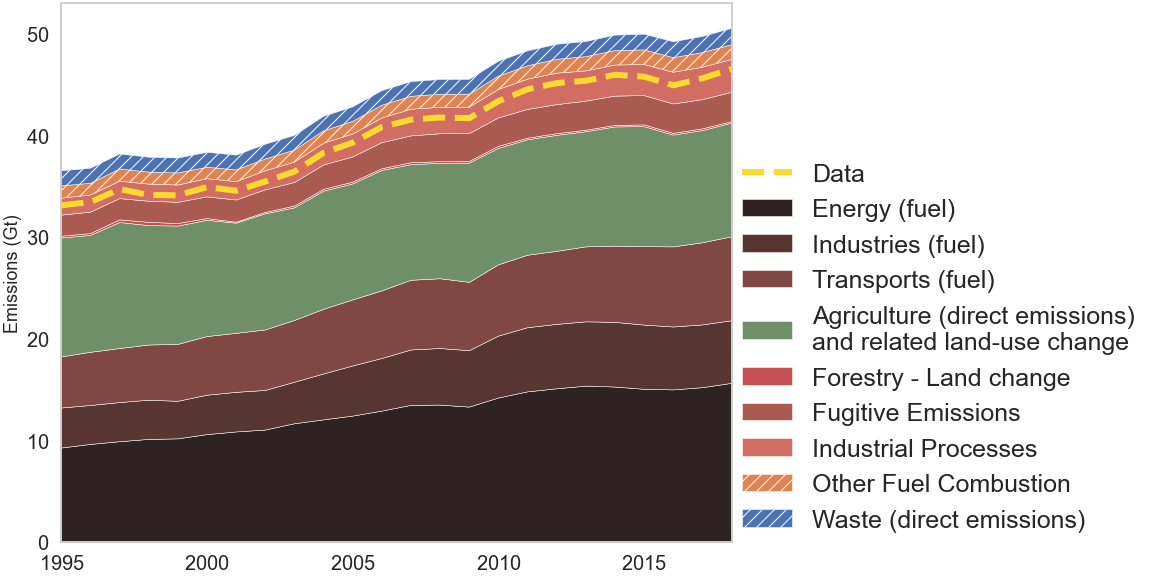

In [16]:
save = False
print('Plotting GHG distribution by categories')
years = [y for y in range(1995,2019)]

emissions_baseline = pd.read_csv('data/emissions_baseline.csv')['emissions'].values
ghg = pd.read_csv('data/climate_watch/ghg_EDGAR_ip.csv').set_index(['sector','year'])

datas = [ 'Electricity/Heat',
        'Manufacturing/Construction','Transportation','Agriculture','Forest fires',
         'Fugitive Emissions', 'Industrial Processes','Other Fuel Combustion',
        'Waste']

# labels can be changed here
labels = [ 'Energy (fuel)',
        'Industries (fuel)','Transports (fuel)','Agriculture (direct emissions) \nand related land-use change',
        'Forestry - Land change',  
         'Fugitive Emissions', 'Industrial Processes','Other Fuel Combustion',
        'Waste (direct emissions)']

to_plot = [ghg.loc[data].value for data in datas]

fig, ax = plt.subplots(figsize=(16,8),constrained_layout=True)

# colors can be changed here
palette2 = [sns.color_palette()[i] for i in [2,1,3,0]]
palette2[0] = (0.4333333333333333, 0.5588235294117647, 0.40784313725490196)
palette = [*sns.color_palette("dark:salmon_r",n_colors=6)[::-1][:5] , *palette2]
palette[3] , palette[5] = palette[5] , palette[3]
palette[4] , palette[7] = palette[7] , palette[4]
palette[6] , palette[7] = palette[7] , palette[6]

stacks = ax.stackplot(years, 
             to_plot,
             labels = labels,
                colors = palette,
                # zorder = -10,
                linewidth=0.5
             )

hatches = ['','','','','','','','//','//']
for stack, hatch in zip(stacks, hatches):
    stack.set_hatch(hatch)

plt.grid()

ax.plot(years,np.array(emissions_baseline)/1e3,ls='--',lw=6,color = sns.color_palette('Set2')[5],label = 'Data')

# I removed the line of Forest carbon sinks, can be added back by
# ax.plot(years, (-ghg.loc['Forestland']).value, ls = '--', lw=3, label = 'Forest carbon sinks \nNatural net zero target', color= 'g')

handles, labels = plt.gca().get_legend_handles_labels()

# order of areas can be changed here
order = [9,0,1,2,3,4,5,6,7,8]
ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order]
          ,loc=(1,0),fontsize = 25) 
ax.margins(x=0)

ax.tick_params(axis='both', labelsize=20 )

# Title can be added here
# ax.set_title('Main greenhouse gases emissions (in Gt of CO2 equivalent)',fontsize=25,pad=15)

ax.set_ylabel('Emissions (Gt)')
# ax.set_xlabel('Years')

# plt.tight_layout()

if save or save_all:
    plt.savefig(f'{save_path}data_em_by_sector.{save_format}',format=save_format)

plt.show()


## GHG distribution over time by gas
Based on Climate watch data

Plotting GHG distribution by gas


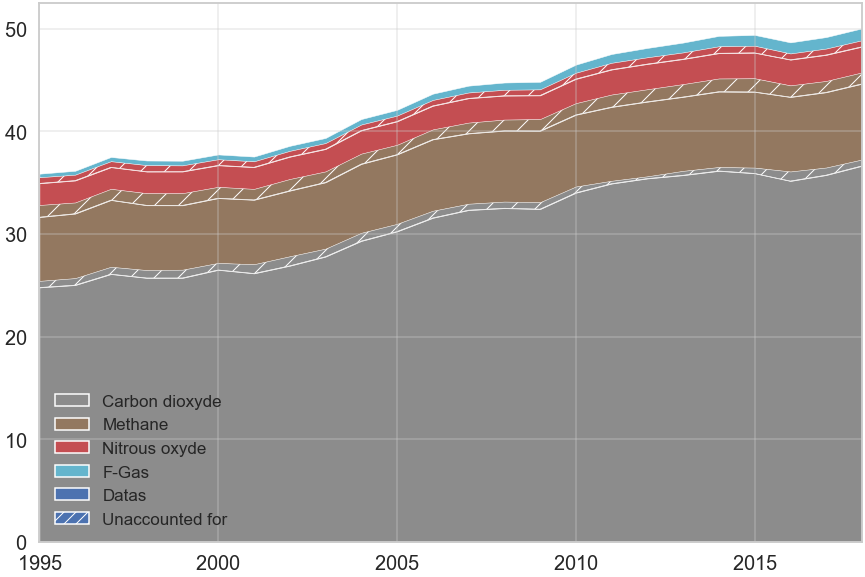

In [17]:
print('Plotting GHG distribution by gas')

save = False

carbon_prices = pd.read_csv('data/emissions_priced.csv')

ghg = pd.read_csv('data/climate_watch/ghg_EDGAR_gas.csv').set_index('gas')

datas = ['CO2_data', 'CO2', 'CH4_data', 'CH4', 'N2O_data', 'N2O','F-Gas']

to_plot = [ghg.loc[data].value for data in datas]

fig, ax = plt.subplots(figsize=(12,8),constrained_layout=True)

palette = [sns.color_palette()[i] for i in [7,7,5,5,3,3,9]]

stacks = ax.stackplot(years, 
             *to_plot,
             # labels = labels,
             colors = palette, 
             zorder = -10,
             lw = 0.5
             )
hatches = [None,'/',None,'/',None,'/',None]
for stack, hatch in zip(stacks, hatches):
    stack.set_hatch(hatch)
    
plt.grid(alpha=0.4)

# phantom plots for legend. it's dirty !
legend_labels = ['Carbon dioxyde','Methane','Nitrous oxyde','F-Gas','Datas','Unaccounted for']
legend_colors = [sns.color_palette()[i] for i in [7,5,3,9,0,0]]
legend_hatches = [None]*5+['//']
stacks_legend = ax.stackplot([],[[]*24]*6,colors = legend_colors,labels = legend_labels)
for stack_legend, hatch in zip(stacks_legend, legend_hatches):
    stack_legend.set_hatch(hatch)
    
# ax.plot(years, carbon_prices.value, ls = '--', lw=5, label = 'Emissions falling under some\ntype of carbon pricing scheme', color= 'r')    
    
ax.legend(loc='lower left'
           ,fontsize=17)

ax.margins(x=0)

ax.tick_params(axis='both', labelsize=20 )
# ax.set_title('Main greenhouse gases emissions (in Gt of CO2 equivalent)',fontsize=25,pad=15)

if save or save_all:
    plt.savefig(f'{save_path}data_em_by_gas.{save_format}',format=save_format)
    
plt.show()

## Historical emissions with respect to GDP

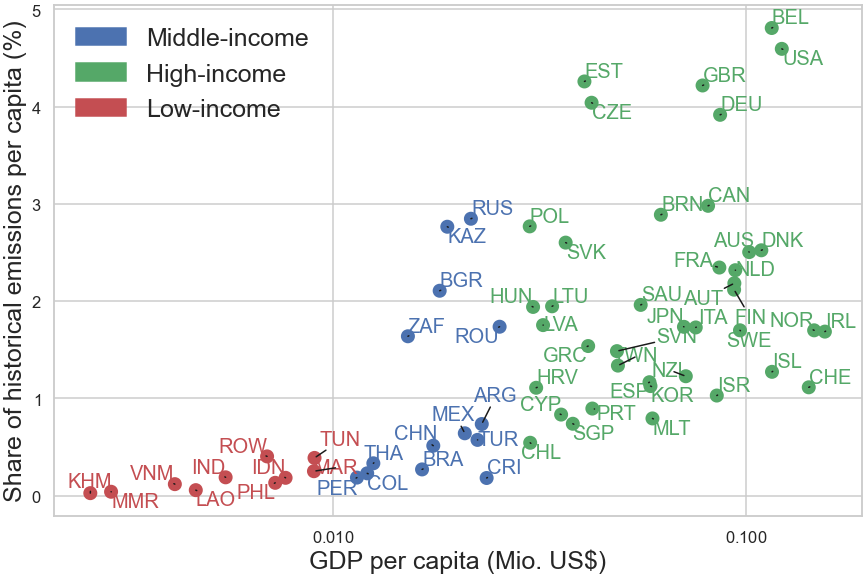

In [18]:
cumul_em = b.cumul_emissions_share.copy()
cumul_em['value'] = cumul_em['value']*labor['value'].sum()/labor['value']
cumul_em['value'] = cumul_em['value']*100/cumul_em['value'].sum()
cumul_em['gdp'] = b.va.groupby('col_country').sum().rename_axis('country')['value']/labor['value']

cumul_em = cumul_em.join(pd.read_csv('data/World bank/country_income_rank.csv',sep=';',index_col=0))

colors = [income_colors[cumul_em.loc[country,'income_label']] for country in cumul_em.index]

fig, ax = plt.subplots(figsize=(12,8),constrained_layout=True)

ax.scatter(cumul_em['gdp'],
           cumul_em['value'],
           color = colors,
           lw=5
           )
ax.set_xscale('log')
# ax.set_yscale('log')

texts = [plt.text(cumul_em['gdp'].loc[country], 
                  cumul_em['value'].loc[country], 
                  country,
                  size=20, 
                  c = colors[i]) for i,country in enumerate(country_list)]

adjust_text(texts, precision=0.001,
        expand_text=(1.01, 1.05), expand_points=(1.01, 1.05),
        force_text=(0.01, 0.25), force_points=(0.01, 0.25),
        arrowprops=dict(arrowstyle='-', color='k'#, alpha=.5
                        )
            )
handles = [mpatches.Patch(color=income_colors[ind], label=ind) for ind in cumul_em['income_label'].drop_duplicates()]
ax.legend(handles=handles,
           fontsize=25,
           loc = 'upper left')
ax.set_xlabel('GDP per capita (Mio. US$)',fontsize = 25)
ax.set_ylabel('Share of historical emissions per capita (%)',fontsize = 25)
ax.xaxis.set_major_formatter(mticker.ScalarFormatter())


if save or save_all:
    plt.savefig(save_path+'per_capita_historical_em_contribution_by_country_by_income_group.'+save_format,format=save_format)
    
plt.show()

## Share of historical cumulative emissions (%)

/var/folders/9z/_4pclxyj4ps7nxcwmqxlhkx17x8ksk/T/ipykernel_2068/42794144.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''])


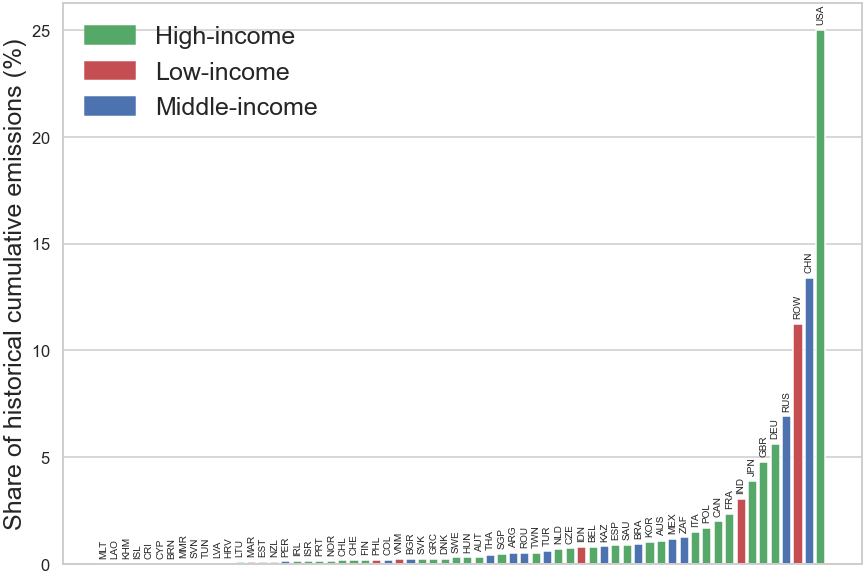

In [52]:
cumul_em = b.cumul_emissions_share*100

cumul_em = cumul_em.join(pd.read_csv('data/World bank/country_income_rank.csv',sep=';',index_col=0))
cumul_em  = cumul_em.sort_values('value')

colors = [income_colors[cumul_em.loc[country,'income_label']] for country in cumul_em.index]

fig, ax = plt.subplots(figsize=(12,8),constrained_layout=True)

ax.bar(cumul_em.index,
       cumul_em['value'],
       color=colors
       )
ax.set_xticklabels([''])
ax.bar_label(ax.containers[0],
             labels=cumul_em.index.get_level_values(0), 
             rotation=90,
              label_type = 'edge',
              padding=5,zorder=10)
handles = [mpatches.Patch(color=income_colors[ind], label=ind) for ind in cumul_em['income_label'].drop_duplicates()]
ax.legend(handles=handles,fontsize=25)
ax.grid(axis='x')
ax.set_ylabel('Share of historical cumulative emissions (%)',fontsize = 25)

if save or save_all:
    plt.savefig(save_path+'cumul_emission_share_bar_plot.'+save_format,format=save_format)
    
plt.show()

## Tax rates as function of GDP for IMF tax schemes

/var/folders/9z/_4pclxyj4ps7nxcwmqxlhkx17x8ksk/T/ipykernel_64449/1634008806.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''])


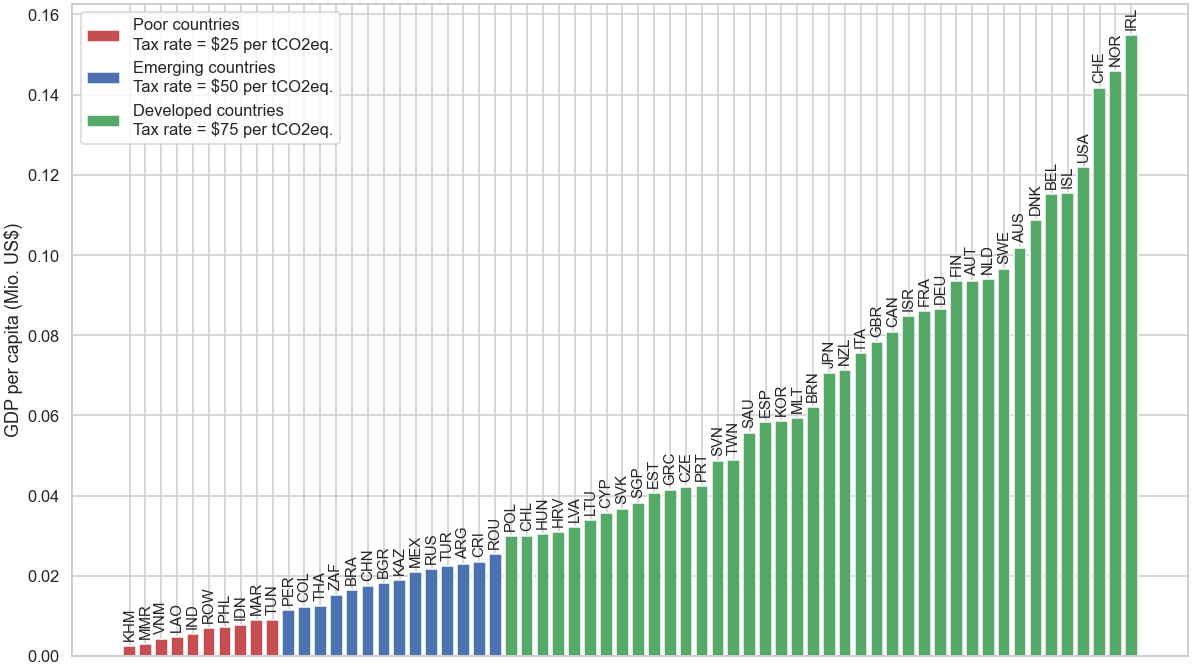

In [16]:
#%% plot figure of tax rate according to gdp p c

fig,ax = plt.subplots(figsize=(20,12))

bars1 = ax.bar(x=gdp_p_c.loc[poor_countries].sort_values('value').index,
       height=gdp_p_c.loc[poor_countries].sort_values('value').value,
       label='Poor countries\nTax rate = $25 per tCO2eq.',
       color='r')
bars2 = ax.bar(x=gdp_p_c.loc[emerging_countries].sort_values('value').index,
       height=gdp_p_c.loc[emerging_countries].sort_values('value').value,
       label='Emerging countries\nTax rate = $50 per tCO2eq.',
       color='b')
bars3 = ax.bar(x=gdp_p_c.loc[rich_countries].sort_values('value').index
       ,height=gdp_p_c.loc[rich_countries].sort_values('value').value,
       label='Developed countries\nTax rate = $75 per tCO2eq.',
       color='g')

ax.bar_label(bars1,
              labels=gdp_p_c.loc[poor_countries].sort_values('value').index,
              rotation=90,
              label_type = 'edge',
              padding=5,
              fontsize=15,
              # color=colors[g],
              zorder=99)
ax.bar_label(bars2,
              labels=gdp_p_c.loc[emerging_countries].sort_values('value').index,
              rotation=90,
              label_type = 'edge',
              padding=5,
              fontsize=15,
              # color=colors[g],
              zorder=99)
ax.bar_label(bars3,
              labels=gdp_p_c.loc[rich_countries].sort_values('value').index,
              rotation=90,
              label_type = 'edge',
              padding=5,
              fontsize=15,
              # color=colors[g],
              zorder=99)

ax.set_xticklabels([''])

ax.set_ylabel('GDP per capita (Mio. US$)')

plt.legend(frameon=True)

if save or save_all:
    plt.savefig(save_path+'carbon_prices_by_gdp_p_c.'+save_format,format=save_format)

plt.show()

# Results

## Load solutions for different carbon taxes

In [5]:
carb_cost_list = np.linspace(0,1e-3,1001)
eta_path = [elasticities_path]
sigma_path = [elasticities_path]
taxed_countries_list = [None]
taxing_countries_list = [None]
taxed_sectors_list = [None]
specific_taxing_list = [None]
fair_tax_list = [False]
pol_pay_tax_list = [False]
tau_factor_list = [1]
tax_scheme_list = [tax_scheme]
y  = 2018
year = str(y)
years = [y]
dir_num = [50,501,601,701]

cases = d.build_cases(eta_path,sigma_path,carb_cost_list,taxed_countries_list,taxing_countries_list,
                      taxed_sectors_list,specific_taxing_list,fair_tax_list,
                      pol_pay_tax_list,tax_scheme_list,tau_factor_list)

sols, baselines, relevant_runs, found_cases, not_found_cases = t.sol.load_sols(cases,
                                                      years,
                                                      dir_num,
                                                      results_path,
                                                      data_path,
                                                      baselines = {2018:b},
                                                      compute_sols = True,
                                                      # compute_hats= True,
                                                      return_not_found_cases=True,
                                                      drop_duplicate_runs=True,
                                                      keep='last')

t_index = np.argmin(np.abs(np.array([sol.params.carb_cost for sol in sols])-1e-4))
sol = sols[t_index]

191 cases found out of 1001
Found cases for 1 years
Years not found : []


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 191/191 [00:57<00:00,  3.29it/s]


In [58]:
#%% compute trade and share traded

trade = baselines[y].iot.groupby(level=[0,1,2]).sum()
trade['cons'] = baselines[y].cons.value
trade['baseline'] = trade.value + trade.cons
trade = trade[['baseline']]
print("Computing trade")
l_trade = []
for i,sol_temp in enumerate(sols):
    l_trade.append(sol_temp.iot.value.values.reshape((N,S,N,S)).sum(axis=-1).ravel()
                   + sol_temp.cons.value.values )

trades = pd.concat([pd.Series(l_t) for l_t in l_trade],axis=1)
trades.index = trade.index
trade = pd.concat([trade,trades],axis=1)

print('Computing share of output traded')

iot_traded_unit = b.iot.copy()
iot_traded_unit['value'] = 1
iot_traded_unit.loc[iot_traded_unit.query("row_country == col_country").index, 'value'] = 0
cons_traded_unit = b.cons.copy()
cons_traded_unit['value'] = 1
cons_traded_unit.loc[cons_traded_unit.query("row_country == col_country").index, 'value'] = 0

share_traded = np.array([((sol.cons.value.to_numpy() * cons_traded_unit.value.to_numpy()).sum() + (sol.iot.value.to_numpy()  * iot_traded_unit.value.to_numpy()).sum())*100 /\
                         (sol.cons.value.to_numpy().sum()+sol.iot.value.to_numpy().sum()) for sol in sols])

total_output = np.array([sol.output.sum() for sol in sols])

Computing trade
Computing share of output traded


## Plot macro effects

Plotting welfare and GDP cost corresponding to a carbon tax


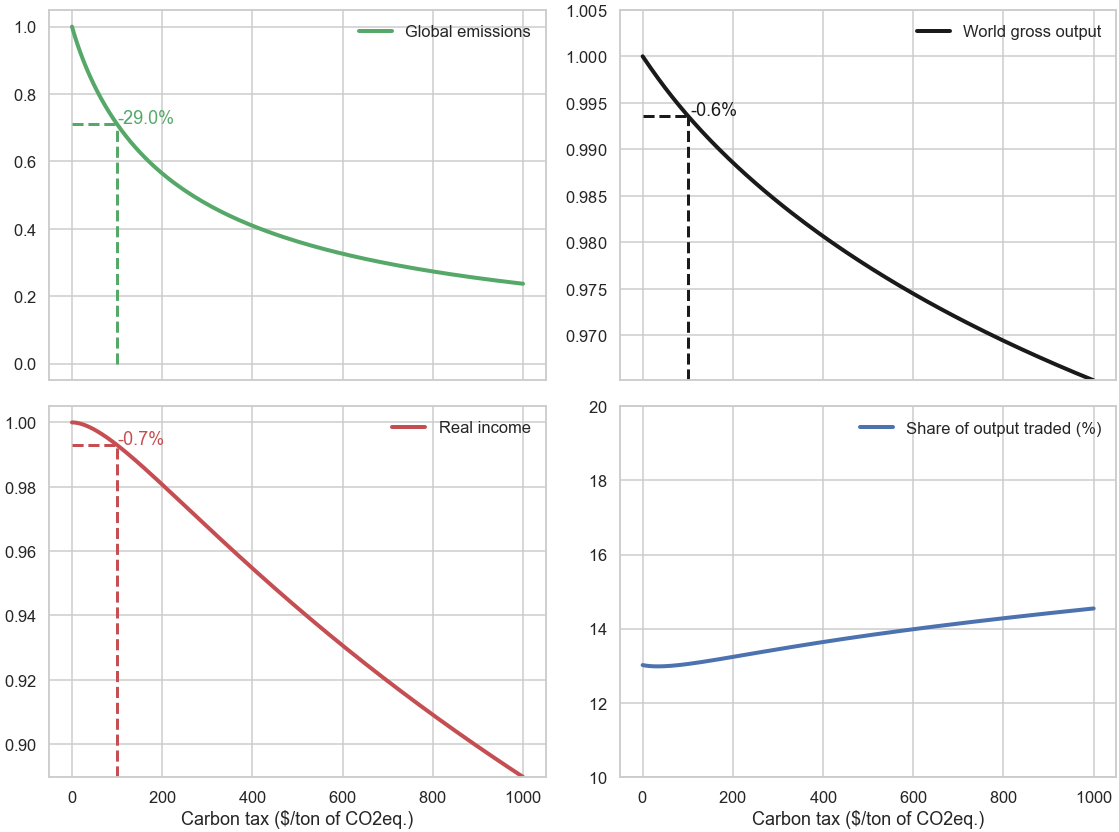

In [21]:
save = False

print('Plotting welfare and GDP cost corresponding to a carbon tax')

carb_taxes = np.array([sol.params.carb_cost*1e6  for sol in sols])
norm_emissions = np.array([sol.co2_prod.value.sum()
                            /baselines[y].co2_prod.value.sum() 
                           for sol in sols])
norm_emissions_real = np.array([sol.run.emissions/baselines[y].co2_prod.value.sum() for sol in sols])
norm_gdp = np.array([sol.va.value.sum()/baselines[y].va.value.sum() for sol in sols])
norm_real_income = np.array([sol.run.utility for sol in sols])
norm_total_output = np.array([sol.output.value.sum()/baselines[y].output.value.sum() for sol in sols])

fig, ax = plt.subplots(2,2,figsize=(16,12))

color = 'g'

# Upper left - Emissions
ax[0,0].plot(carb_taxes,norm_emissions,lw=4,color=color,label='Global emissions')
# ax[0,0].plot(carb_taxes,norm_emissions_real,lw=4,ls=':',color=color,label='Global emissions real')
ax[0,0].legend()
ax[0,0].set_xlabel('')
ax[0,0].tick_params(axis='x', which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
# ax[0,0].set_xlim(0,1000)


y_100 = np.array(norm_emissions)[np.argmin(np.abs(carb_taxes-100))]
# y_0 = runs_low_carb_cost.iloc[0].emissions

ax[0,0].vlines(x=100,
            ymin=0,
            ymax=y_100,
            lw=3,
            ls = '--',
            color = color)

ax[0,0].hlines(y=y_100,
            xmin=0,
            xmax=100,
            lw=3,
            ls = '--',
            color = color)

ax[0,0].margins(y=0)

ax[0,0].annotate(str((100*(y_100-1)).round(0))+'%',
             xy=(100,y_100),
             xytext=(0,0),
             textcoords='offset points',color=color)

ax[0,0].set_ylim(norm_emissions.min(),norm_emissions.max()+0.05)
ax[0,0].set_ylim(-0.05,1.05)

# Upper right - GDP
color = 'b'

ax[1,1].plot(carb_taxes,share_traded,lw=4)
ax[1,1].set_xlabel('')
ax[0,1].tick_params(axis='x', which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
# ax[1,1].set_xlim(0,1000)
ax[1,1].legend(['Share of output traded (%)'])

# y_100 = share_traded[np.argmin(np.abs(carb_taxes-100))]
# 
# ax[0,1].vlines(x=100,
#             ymin=norm_gdp.min(),
#             ymax=y_100,
#             lw=3,
#             ls = '--',
#             color = color)

# ax[0,1].hlines(y=y_100,
#             xmin=0,
#             xmax=100,
#             lw=3,
#             ls = '--',
#             color = color)

ax[1,1].margins(y=0)

# ax[0,1].annotate(str(100*(1-y_100).round(1)),
#               xy=(100,y_100),
#               xytext=(0,0),
#               textcoords='offset points',color=color)

ax[1,1].set_ylim(10,20)

# Bottom left - Welfare
color = 'r'

ax[1,0].plot(carb_taxes,norm_real_income,lw=4,color='r')
ax[1,0].legend(['Real income'])
ax[1,0].set_xlabel('Carbon tax ($/ton of CO2eq.)')
# ax[1,0].set_xlim(0,1000)
# ax[1,0].set_ylim(min(utility),1.001)

y_100 = norm_real_income[np.argmin(np.abs(carb_taxes-100))]
# y_0 = runs_low_carb_cost.iloc[0].emissions

ax[1,0].vlines(x=100,
            ymin=norm_real_income.min(),
            ymax=y_100,
            lw=3,
            ls = '--',
            color = color)

ax[1,0].hlines(y=y_100,
            xmin=0,
            xmax=100,
            lw=3,
            ls = '--',
            color = color)

ax[1,0].margins(y=0)

ax[1,0].set_ylim(norm_real_income.min(),1.005)

ax[1,0].annotate(str((100*(y_100-1)).round(1))+'%',
              xy=(100,y_100),
              xytext=(0,0),
              textcoords='offset points',color=color)

# Bottom right summary
color = 'k'

ax[0,1].plot(carb_taxes,norm_total_output,lw=4,color='k')
ax[0,1].legend(['World gross output'])
ax[1,1].set_xlabel('Carbon tax ($/ton of CO2eq.)')
# ax[0,1].set_xlim(0,1000)
# ax[1,1].set_ylim(10,15)

y_100 = norm_total_output[np.argmin(np.abs(carb_taxes-100))]
# y_0 = runs_low_carb_cost.iloc[0].emissions

ax[0,1].vlines(x=100,
            ymin=norm_total_output.min(),
            ymax=y_100,
            lw=3,
            ls = '--',
            color = color)

ax[0,1].hlines(y=y_100,
            xmin=0,
            xmax=100,
            lw=3,
            ls = '--',
            color = color)

ax[0,1].margins(y=0)

ax[0,1].set_ylim(norm_total_output.min(),1.005)

ax[0,1].annotate(str((100*(y_100-1)).round(1))+'%',
              xy=(105,y_100),
              xytext=(0,0),
              textcoords='offset points',color=color)

plt.tight_layout()

if save or save_all:
    plt.savefig(save_path+'macro_effects.'+save_format,format=save_format)
plt.show()

## Plot micro effects

/var/folders/9z/_4pclxyj4ps7nxcwmqxlhkx17x8ksk/T/ipykernel_64449/229080842.py:53: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  plot2 = sns.kdeplot(data=data_no_z_i,
/var/folders/9z/_4pclxyj4ps7nxcwmqxlhkx17x8ksk/T/ipykernel_64449/229080842.py:53: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  plot2 = sns.kdeplot(data=data_no_z_i,


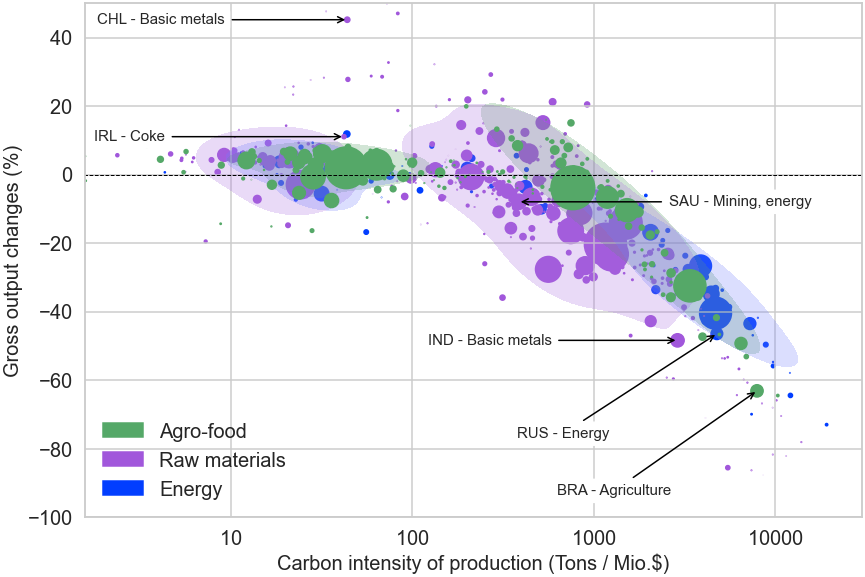

In [11]:
from matplotlib.ticker import ScalarFormatter

save = False

country_list = b.country_list
C = len(country_list)
sector_list = b.sector_list

p_hat_sol = sol.res.price_hat.to_numpy().reshape(C,S)
E_hat_sol = sol.res.output_hat.to_numpy().reshape(C,S)
E_hat_sol_percent = (E_hat_sol-1)*100
q_hat_sol = E_hat_sol / p_hat_sol
q_hat_sol_percent = (q_hat_sol-1)*100

sector_map = pd.read_csv(data_path+'industry_labels_after_agg_expl_wgroup.csv').set_index('ind_code')

data = pd.DataFrame(data = E_hat_sol_percent.ravel(),
                    index = pd.MultiIndex.from_product([country_list,sector_map.index.get_level_values(level=0).to_list()],
                                                       names=['country','sector']),
                    columns=['value'])
data = data.reset_index().merge(sector_map.reset_index(),how='left',left_on='sector',right_on='ind_code').set_index(['country','sector']).drop('ind_code',axis=1)
data['co2_intensity'] = b.co2_intensity.value.values
data['output'] = b.output.value.values
data=data.sort_values('group_code')
data = data.loc[data.group_label.isin(['Agro-food','Raw materials','Energy'])]

sector_list_full = []
for sector in sector_list:
    sector_list_full.append(sector_map.loc['D'+sector].industry)

group_labels_sorted = data.group_label.drop_duplicates().to_list()

data_no_z =data.copy()
data_no_z = data_no_z[data_no_z['co2_intensity'] != 0]
# data_no_z = data_no_z[data_no_z['co2_intensity'] < 1e4]
# data_no_z['co2_intensity'] = np.log(data_no_z['co2_intensity'])
data_no_z = data_no_z[['co2_intensity','value','group_label','group_code','output']]

data_no_z_1 = data_no_z[data_no_z['co2_intensity'] < 100].copy()
data_no_z_2 = data_no_z[data_no_z['co2_intensity'] >= 100].copy()

fig, ax = plt.subplots(figsize=(12,8),constrained_layout=True)
# # sns.move_legend(plot, "lower left", bbox_to_anchor=(.55, .45), title='Species')

# plot.fig.get_axes()[0].legend(loc='lower left')
# # plt.legend(loc='lower left')

palette = [sns.color_palette('bright')[i] for i in [2,4,0,3,1,7]]
palette[0] = sns.color_palette()[2]
palette[1] = sns.color_palette("hls", 8)[-2]
for data_no_z_i in [data_no_z_1,data_no_z_2] :
# for data_no_z_i in [data_no_z] :
    plot2 = sns.kdeplot(data=data_no_z_i,
                x='co2_intensity',
                y="value",
                hue = 'group_label',
                fill = True,
                alpha = 0.25,
                log_scale=(True, False),
                # height=10,
                # ratio=5,
                # bw_adjust=0.5,
                weights = 'output',
                legend=False,
                levels = 2,
                palette = palette,
                common_norm = True,
                # shade=True,
                thresh = 0.2,
                # fill = False,
                # alpha=0.6,
                # hue_order = data.group_label.drop_duplicates().to_list()[::-1],
                ax = ax
                )
for data_no_z_i in [data_no_z_1,data_no_z_2] :
    for i,group in enumerate(data_no_z_i.group_code.drop_duplicates().to_list()):
        ax.scatter(data_no_z_i[data_no_z_i['group_code'] == group].co2_intensity,
                   data_no_z_i[data_no_z_i['group_code'] == group].value,
                   color=palette[i],
                   s=(data_no_z_i[data_no_z_i['group_code'] == group].output)/1e3,zorder=1-i)

ax.set_ylabel('Gross output changes (%)',
                fontsize=20
                )
ax.set_xscale('log')
ax.set_ylim(-100,+50)
# ax.set_ylim(-80, +80)

# ax.set_xlim(0.5,20000)
ax.set_xlim(data_no_z.co2_intensity.min(),3e4)
ax.margins(x=0)
ax.tick_params(axis='both', which='major', labelsize=20)


ax.set_xlabel('Carbon intensity of production (Tons / Mio.$)',
                fontsize=20)

handles = [mpatches.Patch(color=palette[ind], label=group_labels_sorted[ind]) for ind,group in enumerate(group_labels_sorted)]
ax.legend(handles=handles,fontsize=20, loc = 'lower left')

ax.xaxis.set_major_formatter(ScalarFormatter())

ax.hlines(0,xmin=b.co2_intensity.value.min(),xmax=1e5,colors='black',ls='--',lw=1)

# sec = '20'
# sector = sector_map.loc['D' + sec].industry
# sector_index = sector_list.index(sec)

# country = 'RUS'
# country_index = country_list.index(country)

# ax.annotate(country + ' - ' + sector,
#             xy=(b.co2_intensity.loc[country, sec].value, q_hat_sol_percent[country_index, sector_index]),
#             xycoords='data',
#             xytext=(-250, 0),
#             textcoords='offset points',
#             va='center',
#             arrowprops=dict(arrowstyle="->",
#                             connectionstyle="arc3", color='black'),
#             bbox=dict(boxstyle="round", fc="w"), zorder=10
#             )

# sec = '28'
# sector = sector_map.loc['D' + sec].industry
# sector_index = sector_list.index(sec)

# country = 'CHN'
# country_index = country_list.index(country)

# ax.annotate(country + ' - ' + sector,
#             xy=(b.co2_intensity.loc[country, sec].value, q_hat_sol_percent[country_index, sector_index]),
#             xycoords='data',
#             xytext=(-50, -80),
#             textcoords='offset points',
#             va='center',
#             arrowprops=dict(arrowstyle="->",
#                             connectionstyle="arc3", color='black'),
#             bbox=dict(boxstyle="round", fc="w"), zorder=10
#             )

# sec = '35'
# sector = sector_map.loc['D' + sec].industry
# sector_index = sector_list.index(sec)

# country = 'NOR'
# country_index = country_list.index(country)

# ax.annotate(country + ' - ' + sector,
#             xy=(b.co2_intensity.loc[country, sec].value, q_hat_sol_percent[country_index, sector_index]),
#             xycoords='data',
#             xytext=(20, 80),
#             textcoords='offset points',
#             va='center',
#             arrowprops=dict(arrowstyle="->",
#                             connectionstyle="arc3", color='black'),
#             bbox=dict(boxstyle="round", fc="w"), zorder=10
#             )

# sec = '50'
# sector = sector_map.loc['D' + sec].industry
# sector_index = sector_list.index(sec)

# country = 'DEU'
# country_index = country_list.index(country)

# ax.annotate(country + ' - ' + sector,
#             xy=(b.co2_intensity.loc[country, sec].value, q_hat_sol_percent[country_index, sector_index]),
#             xycoords='data',
#             xytext=(80, 15),
#             textcoords='offset points',
#             va='center',
#             arrowprops=dict(arrowstyle="->",
#                             connectionstyle="arc3", color='black'),
#             bbox=dict(boxstyle="round", fc="w"), zorder=10
#             )

# sec = '01T02'
# sector = sector_map.loc['D' + sec].industry
# sector_index = sector_list.index(sec)

# country = 'BRA'
# country_index = country_list.index(country)

# ax.annotate(country + ' - ' + sector,
#             xy=(b.co2_intensity.loc[country, sec].value, q_hat_sol_percent[country_index, sector_index]),
#             xycoords='data',
#             xytext=(-250, -5),
#             textcoords='offset points',
#             va='center',
#             arrowprops=dict(arrowstyle="->",
#                             connectionstyle="arc3", color='black'),
#             bbox=dict(boxstyle="round", fc="w"), zorder=10
#             )

# sec = '01T02'
# sector = sector_map.loc['D' + sec].industry
# sector_index = sector_list.index(sec)

# country = 'CHE'
# country_index = country_list.index(country)

# ax.annotate(country + ' - ' + sector,
#             xy=(b.co2_intensity.loc[country, sec].value, q_hat_sol_percent[country_index, sector_index]),
#             xycoords='data',
#             xytext=(100, -35),
#             textcoords='offset points',
#             va='center',
#             arrowprops=dict(arrowstyle="->",
#                             connectionstyle="arc3", color='black'),
#             bbox=dict(boxstyle="round", fc="w"), zorder=10
#             )

# plt.tight_layout()

sec = '24'
sector = sector_map.loc['D' + sec].industry
sector_index = sector_list.index(sec)

country = 'CHL'
country_index = country_list.index(country)

ax.annotate(country + ' - ' + sector,
            xy=(b.co2_intensity.loc[country, sec].value, E_hat_sol_percent[country_index, sector_index]),
            xycoords='data',
            xytext=(-250, 0),
            textcoords='offset points',
            va='center',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3", color='black'),
            bbox=dict(boxstyle="round", fc="w"), zorder=10,
            fontsize = 15
            )

sec = '24'
sector = sector_map.loc['D' + sec].industry
sector_index = sector_list.index(sec)

country = 'IND'
country_index = country_list.index(country)

ax.annotate(country + ' - ' + sector,
            xy=(b.co2_intensity.loc[country, sec].value, E_hat_sol_percent[country_index, sector_index]),
            xycoords='data',
            xytext=(-250, 0),
            textcoords='offset points',
            va='center',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3", color='black'),
            bbox=dict(boxstyle="round", fc="w"), zorder=10,
            fontsize = 15
            )

sec = '24'
sector = sector_map.loc['D' + sec].industry
sector_index = sector_list.index(sec)

country = 'PER'
country_index = country_list.index(country)

ax.annotate(country + ' - ' + sector,
            xy=(b.co2_intensity.loc[country, sec].value, E_hat_sol_percent[country_index, sector_index]),
            xycoords='data',
            xytext=(-250, 20),
            textcoords='offset points',
            va='center',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3", color='black'),
            bbox=dict(boxstyle="round", fc="w"), zorder=10,
            fontsize = 15
            )
sec = '19'
sector = sector_map.loc['D' + sec].industry
sector_index = sector_list.index(sec)

country = 'IRL'
country_index = country_list.index(country)

ax.annotate(country + ' - ' + sector,
            xy=(b.co2_intensity.loc[country, sec].value, E_hat_sol_percent[country_index, sector_index]),
            xycoords='data',
            xytext=(-250, 0),
            textcoords='offset points',
            va='center',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3", color='black'),
            bbox=dict(boxstyle="round", fc="w"), zorder=10,
            fontsize = 15
            )

sec = '35'
sector = sector_map.loc['D' + sec].industry
sector_index = sector_list.index(sec)

country = 'RUS'
country_index = country_list.index(country)

ax.annotate(country + ' - ' + sector,
            xy=(b.co2_intensity.loc[country, sec].value, E_hat_sol_percent[country_index, sector_index]),
            xycoords='data',
            xytext=(-200, -100),
            textcoords='offset points',
            va='center',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3", color='black'),
            bbox=dict(boxstyle="round", fc="w"), zorder=10,
            fontsize = 15
            )

sec = '01T02'
sector = sector_map.loc['D' + sec].industry
sector_index = sector_list.index(sec)

country = 'BRA'
country_index = country_list.index(country)

ax.annotate(country + ' - ' + sector,
            xy=(b.co2_intensity.loc[country, sec].value, E_hat_sol_percent[country_index, sector_index]),
            xycoords='data',
            xytext=(-200, -100),
            textcoords='offset points',
            va='center',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3", color='black'),
            bbox=dict(boxstyle="round", fc="w"), zorder=10,
            fontsize = 15
            )

sec = '05T06'
sector = sector_map.loc['D' + sec].industry
sector_index = sector_list.index(sec)

country = 'SAU'
country_index = country_list.index(country)

ax.annotate(country + ' - ' + sector,
            xy=(b.co2_intensity.loc[country, sec].value, E_hat_sol_percent[country_index, sector_index]),
            xycoords='data',
            xytext=(150, 0),
            textcoords='offset points',
            va='center',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3", color='black'),
            bbox=dict(boxstyle="round", fc="w"), zorder=10,
            fontsize = 15
            )

if save or save_all:
    plt.savefig(save_path+'micro_effect.pdf',format='pdf')
plt.show()

## Welfare changes wrt gdp per capita

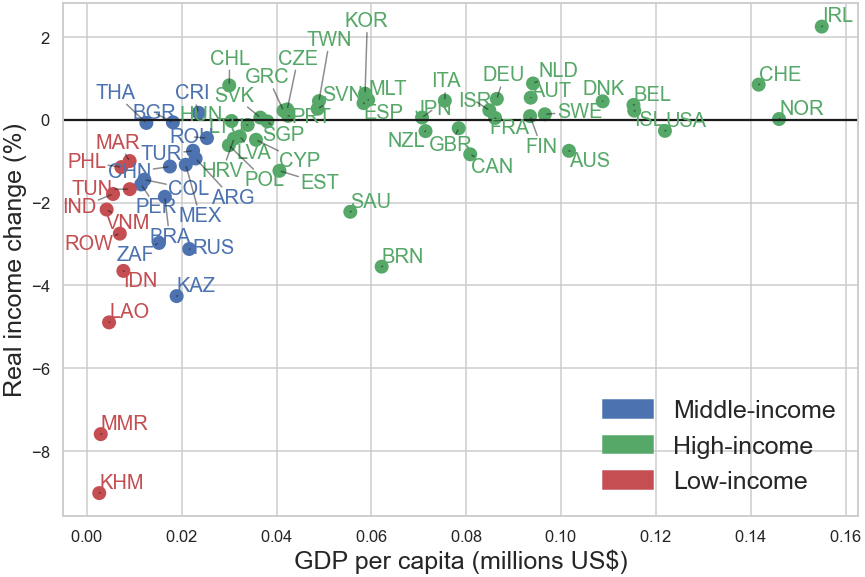

In [22]:
welfare_change = sol.utility.copy()

welfare_change['gdp_p_c'] = (b.va.groupby('col_country').sum()/labor).rename_axis('country')
welfare_change = welfare_change.join(
    pd.read_csv('data/World bank/country_income_rank.csv',sep=';',index_col=0)
    )
welfare_change['hat'] = (welfare_change['hat']-1)*100

fig, ax = plt.subplots(figsize=(12,8),constrained_layout=True)

colors = [income_colors[welfare_change.loc[country,'income_label']] for country in welfare_change.index]

ax.scatter(welfare_change['gdp_p_c'],
           welfare_change['hat'],
           color = colors,
           lw=5
           )

texts = [plt.text(welfare_change['gdp_p_c'].loc[country], 
                  welfare_change['hat'].loc[country], 
                  country,
                  size=20, 
                  c = colors[i]) for i,country in enumerate(country_list)]

adjust_text(texts, precision=0.001,
        expand_text=(1.01, 1.05), expand_points=(1.01, 1.05),
        force_text=(0.01, 0.25), force_points=(0.01, 0.25),
        arrowprops=dict(arrowstyle='-', color='k', alpha=.5)
            )
handles = [mpatches.Patch(color=income_colors[ind], label=ind) for ind in welfare_change['income_label'].drop_duplicates()]
ax.legend(handles=handles,
           fontsize=25,
           loc = 'lower right')
ax.set_xlabel('GDP per capita (millions US$)',fontsize = 25)
ax.set_ylabel('Real income change (%)',fontsize = 25)

ax.axhline(0, color='k')

if save or save_all:
    plt.savefig(save_path+'welfare_change_by_gdp_by_country_by_income_group.'+save_format,format=save_format)
    
plt.show()

## Effective tax rate

In [23]:
#%% calculate eff tax rate

tax_paid = sol.run.carb_cost*(
    b.co2_intensity.rename_axis(['row_country','row_sector'])
    *(sol.iot.groupby(['row_country','row_sector','col_country']).sum()+sol.cons)
                              ).groupby('col_country').sum()

expenditure = (
    (1+sol.run.carb_cost*b.co2_intensity.rename_axis(['row_country','row_sector']))
    *(sol.iot.groupby(['row_country','row_sector','col_country']).sum()+sol.cons)
                              ).groupby('col_country').sum()

eff_tax_rate = tax_paid/expenditure

eff_tax_rate = eff_tax_rate.join(pd.read_csv('data/World bank/country_income_rank.csv',sep=';',index_col=0)).sort_values('value')


/var/folders/9z/_4pclxyj4ps7nxcwmqxlhkx17x8ksk/T/ipykernel_11335/1314871846.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''])


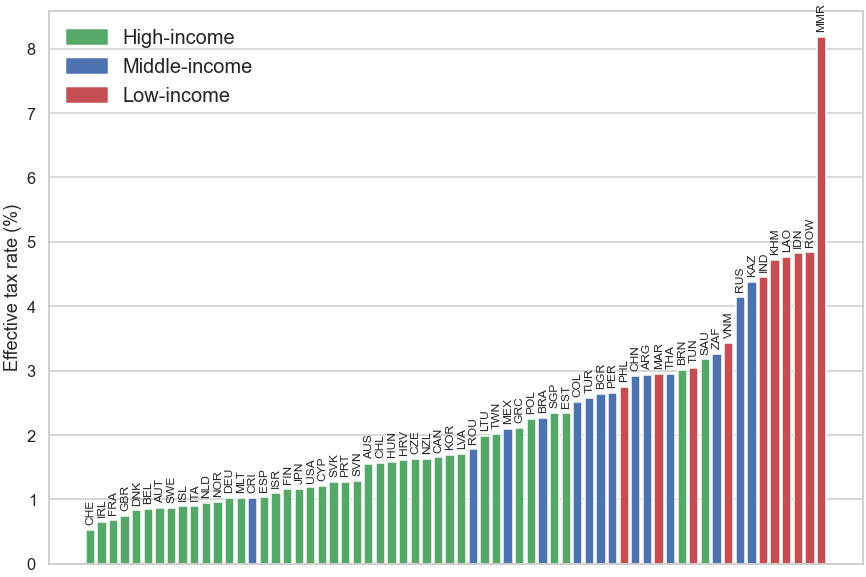

In [24]:
#%% Plot effective tax rate

colors = [income_colors[eff_tax_rate.loc[country,'income_label']] for country in eff_tax_rate.index]

fig, ax = plt.subplots(figsize=(12,8),constrained_layout=True)

ax.bar(eff_tax_rate.index,
       eff_tax_rate['value']*100,
       color=colors
       )
ax.set_xticklabels([''])
ax.bar_label(ax.containers[0],
             labels=eff_tax_rate.index.get_level_values(0), 
             rotation=90,
              label_type = 'edge',
              fontsize = 12,
              padding=5,zorder=10)
handles = [mpatches.Patch(color=income_colors[ind], label=ind) for ind in eff_tax_rate['income_label'].drop_duplicates()]
ax.legend(handles=handles,fontsize=20)

ax.set_ylabel('Effective tax rate (%)')
plt.grid(axis='x')

if save or save_all:
    plt.savefig(save_path+'effective_tax_rate_by_country_by_income_group.'+save_format,format=save_format)
    
plt.show()

## Reallocation from country to country

In [25]:
print('Computing production reallocation country-wise')

country_map = pd.read_csv('data/countries_after_agg.csv',sep=';').set_index('country')

country_dist = []
country_change = []
country_realloc = []
country_realloc_pos = []
country_realloc_neg = []
for country in country_list:
    temp = sol.output.xs(country,level=0).value-b.output.xs(country,level=0).value
    country_change.append(temp.sum())
    country_realloc_pos.append(temp[temp>0].sum())
    country_realloc_neg.append(temp[temp<0].sum())

country_dist_df = pd.DataFrame(index=country_list)
country_dist_df['output'] = b.output.groupby(level=0).sum().value.values
country_dist_df['output_new'] = sol.output.groupby(level=0).sum().value.values
country_dist_df['realloc_pos'] = country_realloc_pos
country_dist_df['realloc_neg'] = country_realloc_neg
country_dist_df['change'] = country_change
country_dist_df['share_percent'] = (country_dist_df['output']/country_dist_df['output'].sum())*100
country_dist_df['share_new_percent'] = (country_dist_df['output_new']/country_dist_df['output_new'].sum())*100

country_dist_df['realloc_pos'] = np.abs(country_dist_df['realloc_pos'])
country_dist_df['realloc_neg'] = np.abs(country_dist_df['realloc_neg'])
country_dist_df['realloc'] = country_dist_df[['realloc_neg','realloc_pos']].min(axis=1)
country_dist_df['realloc'] = country_dist_df['realloc'] * np.sign(country_dist_df['change'])
country_dist_df['change_tot_nom'] = (country_dist_df['change']+country_dist_df['realloc'])

country_dist_df['realloc_percent'] = (country_dist_df['realloc']/country_dist_df['output'])*100
country_dist_df['change_percent'] = (country_dist_df['change']/country_dist_df['output'])*100
country_dist_df['total_change'] = country_dist_df['realloc_percent'] + country_dist_df['change_percent']

Computing production reallocation country-wise


Plotting production reallocation in percentages


/var/folders/9z/_4pclxyj4ps7nxcwmqxlhkx17x8ksk/T/ipykernel_11335/3560228323.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']


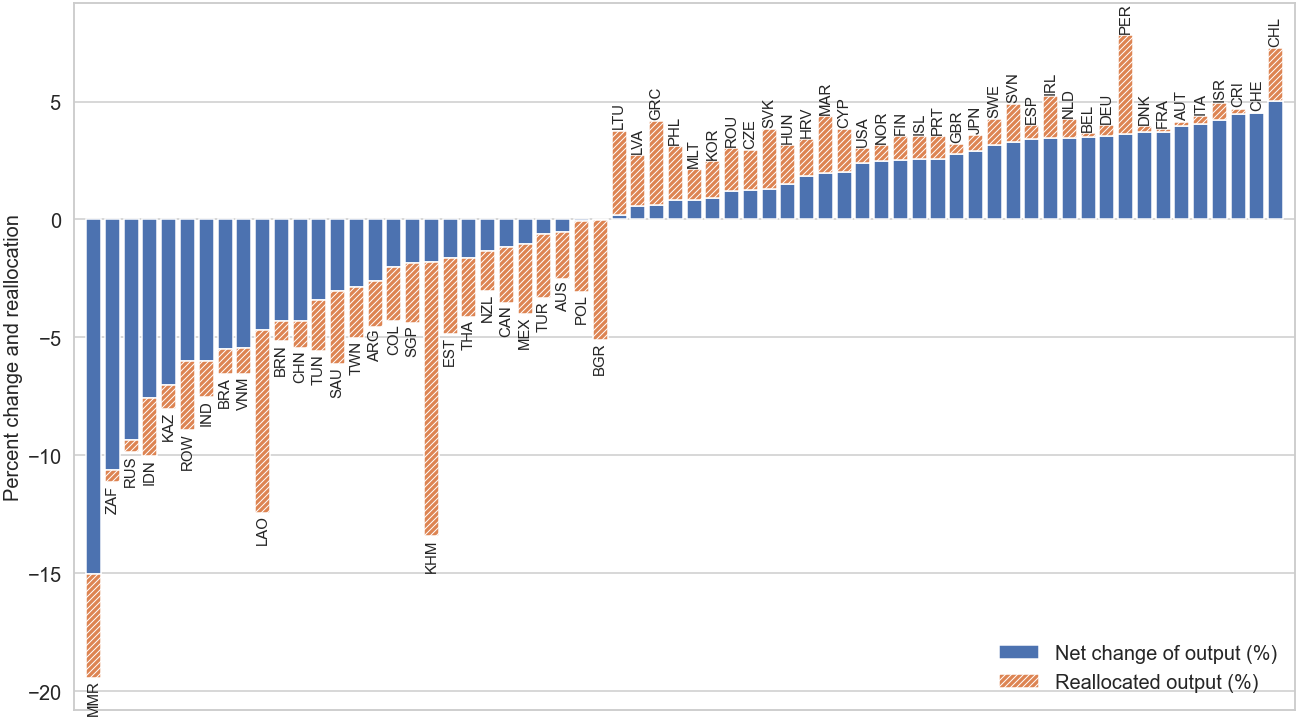

In [26]:
print('Plotting production reallocation in percentages')

country_dist_df.sort_values('change_percent',inplace = True)

fig, ax = plt.subplots(figsize=(18,10),constrained_layout = True)

ax.bar(country_dist_df.index.get_level_values(0)
            ,country_dist_df.change_percent
            ,label='Net change of output (%)',
            )

ax.bar(country_dist_df.index.get_level_values(0)
            ,country_dist_df.realloc_percent
            ,bottom = country_dist_df.change_percent
            ,label='Reallocated output (%)',
            # color=colors,
            hatch="////")

ax.set_xticklabels(['']
                    , rotation=75
                    ,fontsize=19)
ax.tick_params(axis='y', labelsize = 20)
ax.margins(x=0.01)
ax.set_ylabel('Percent change and reallocation',
              fontsize = 20)


leg = ax.legend(fontsize=20,loc='lower right')
ax.grid(axis='x')

ax.bar_label(ax.containers[1],
             labels=country_dist_df.index.get_level_values(0),
             rotation=90,
              label_type = 'edge',
              padding=2,zorder=10,fontsize=15)

total_output_net_decrease = b.output.value.sum() - sol.output.value.sum()
total_output = b.output.value.sum()
total_output_decrease_percent = (total_output_net_decrease/total_output)*100

total_output_reallocated = np.abs(country_dist_df.realloc).sum()
total_output_reallocated_percent = (total_output_reallocated/total_output)*100

# ax.annotate('Overall, '+str(total_output_reallocated_percent.round(2))+'% of gross output\nwould be reallocated country-wise for\na net reduction of output of '+str(total_output_decrease_percent.round(2))+'%',
#              xy=(41,-16),fontsize=25,zorder=10,backgroundcolor='w')

if save or save_all:
    plt.savefig(save_path+'cross_country_effects.'+save_format,format=save_format)

plt.show()

## Labor reallocation within country

/var/folders/9z/_4pclxyj4ps7nxcwmqxlhkx17x8ksk/T/ipykernel_11335/4029714687.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''])


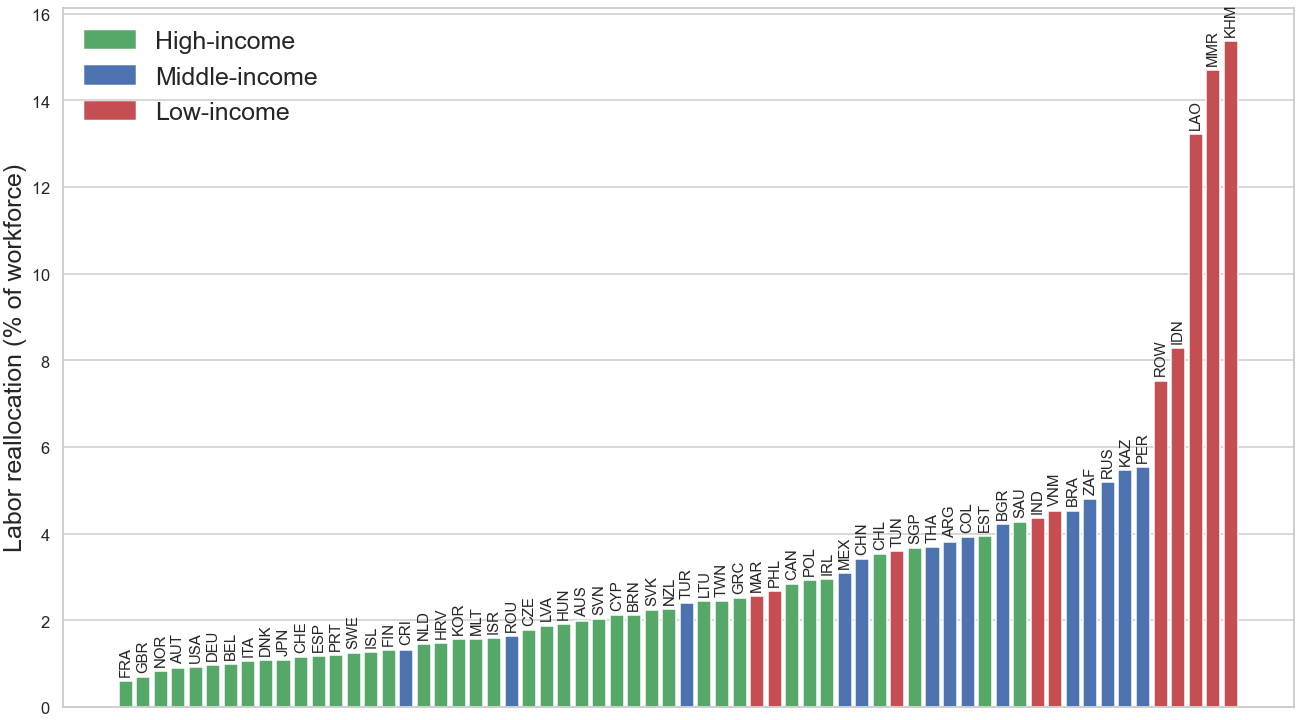

In [27]:
labor = b.labor.set_index('country').rename_axis('col_country')['2018'].to_frame()
labor.columns = ['value']

wage_new = sol.va.groupby('col_country').sum()/labor
wage_old = b.va.groupby('col_country').sum()/labor

labor_realloc = np.abs(sol.va/wage_new - b.va/wage_old).groupby('col_country').sum()/2

labor_realloc['percent'] = labor_realloc['value']*100/labor['value']

labor_realloc = labor_realloc.sort_values('percent')

labor_realloc = labor_realloc.join(pd.read_csv('data/World bank/country_income_rank.csv',sep=';',index_col=0))


colors = [income_colors[labor_realloc.loc[country,'income_label']] for country in labor_realloc.index]

fig, ax = plt.subplots(figsize=(18,10),constrained_layout = True)

ax.bar(labor_realloc.index,
       labor_realloc['percent'],
       color=colors
       )
ax.set_xticklabels([''])
ax.bar_label(ax.containers[0],
             labels=labor_realloc.index.get_level_values(0), 
             rotation=90,
              label_type = 'edge',
              padding=5,zorder=10,fontsize=15)
handles = [mpatches.Patch(color=income_colors[ind], label=ind) for ind in labor_realloc['income_label'].drop_duplicates()]
ax.legend(handles=handles,fontsize=25)
ax.grid(axis='x')
ax.set_ylabel('Labor reallocation (% of workforce)',fontsize = 25)

if save or save_all:
    plt.savefig(save_path+'labor_reallocation_by_country_by_income_group.'+save_format,format=save_format)
    
plt.show()

## Reallocation from sector to sector

In [28]:
print('Computing production reallocation sector-wise')

sector_map = pd.read_csv('data/industry_labels_after_agg_expl.csv', sep=';').set_index('ind_code')
sector_list = sol.output.index.get_level_values(1).drop_duplicates().to_list()
sector_list_full = []
for sector in sector_list:
    sector_list_full.append(sector_map.loc['D' + sector].industry)

# Construct dataframe
output = sol.output

sector_dist = []
sector_change = []
sector_realloc = []
sector_realloc_pos = []
sector_realloc_neg = []
for sector in sector_list:
    temp = sol.output.xs(sector,level=1).value-b.output.xs(sector,level=1).value
    sector_change.append(temp.sum())
    sector_realloc_pos.append(temp[temp>0].sum())
    sector_realloc_neg.append(temp[temp<0].sum())
sector_map = pd.read_csv('data/industry_labels_after_agg_expl_wgroup.csv').set_index('ind_code')
sector_dist_df = sector_map.copy()
sector_dist_df['output'] = b.output.groupby(level=1).sum().value.values
sector_dist_df['output_new'] = sol.output.groupby(level=1).sum().value.values
sector_dist_df['realloc_pos'] = sector_realloc_pos
sector_dist_df['realloc_neg'] = sector_realloc_neg
sector_dist_df['change'] = sector_change

sector_dist_df['realloc_pos'] = np.abs(sector_dist_df['realloc_pos'])
sector_dist_df['realloc_neg'] = np.abs(sector_dist_df['realloc_neg'])
sector_dist_df['realloc'] = sector_dist_df[['realloc_neg','realloc_pos']].min(axis=1)
sector_dist_df['realloc'] = sector_dist_df['realloc'] * np.sign(sector_dist_df['change'])
sector_dist_df['change_tot_nom'] = (sector_dist_df['change']+sector_dist_df['realloc'])
sector_dist_df['realloc_share_nom'] = (sector_dist_df['realloc']/sector_dist_df['change_tot_nom']) * np.sign(sector_dist_df['change'])

sector_dist_df['realloc_percent'] = (sector_dist_df['realloc']/sector_dist_df['output'])*100
sector_dist_df['change_percent'] = (sector_dist_df['change']/sector_dist_df['output'])*100
sector_dist_df['change_tot'] = (sector_dist_df['change_percent']+sector_dist_df['realloc_percent'])
sector_dist_df['realloc_share_neg'] = (sector_dist_df['realloc_percent']/sector_dist_df['change_tot']) * np.sign(sector_dist_df['change'])

Computing production reallocation sector-wise


Plotting production reallocation in percentages


/var/folders/9z/_4pclxyj4ps7nxcwmqxlhkx17x8ksk/T/ipykernel_11335/1957579807.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']


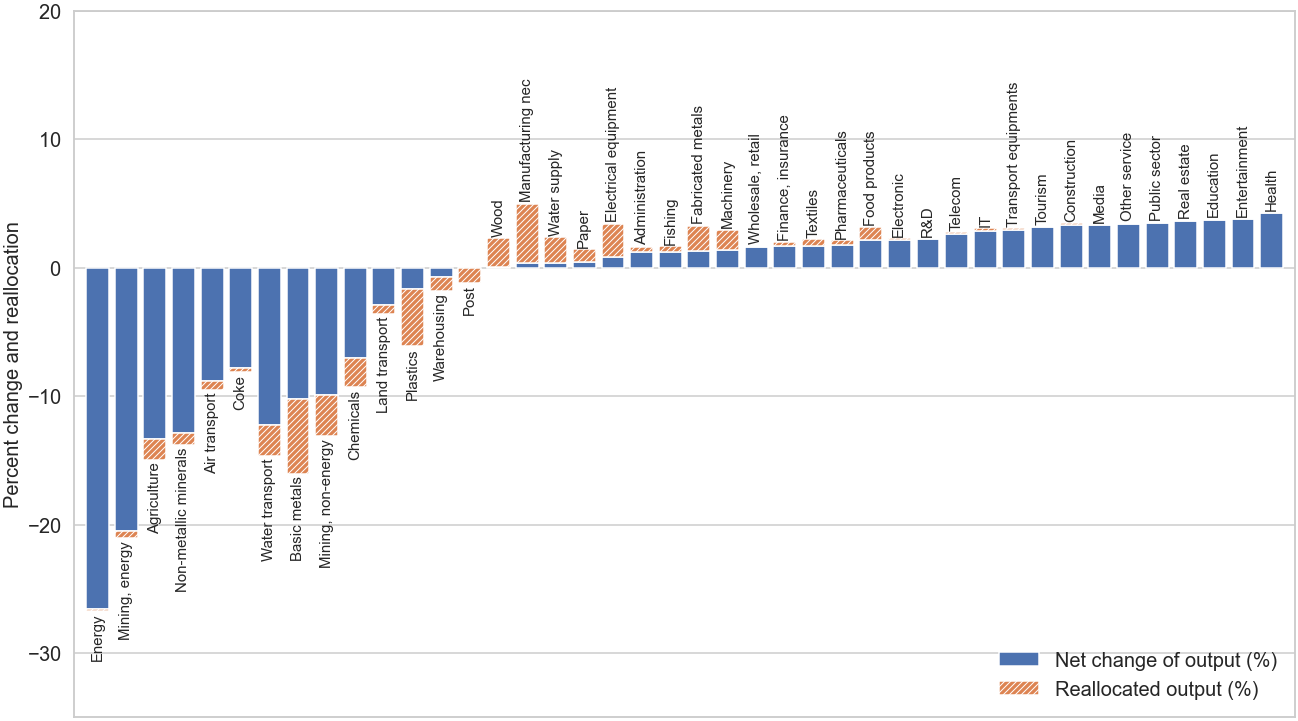

In [29]:
print('Plotting production reallocation in percentages')

sector_org = sector_dist_df[['industry', 'change_percent', 'realloc_percent','realloc_share_neg']].copy()
sector_pos = sector_org[sector_org['realloc_share_neg']>0].copy()
sector_pos.sort_values('change_percent', ascending = True, inplace = True)
sector_neg1 = sector_org[sector_org['realloc_share_neg']<= -0.15].copy()
sector_neg1.sort_values('change_percent',ascending = True, inplace = True)
sector_neg2 = sector_org[(sector_org['realloc_share_neg']> -0.15) & (sector_org['realloc_share_neg']<=0)].copy()
sector_neg2.sort_values('change_percent',ascending = True, inplace = True)

sector_use = pd.concat([sector_neg2, sector_neg1, sector_pos], ignore_index=True)

fig, ax = plt.subplots(figsize=(18,10),constrained_layout = True)

ax.bar(sector_use.industry
            ,sector_use.change_percent
            ,label='Net change of output (%)',
            )

ax.bar(sector_use.industry
            ,sector_use.realloc_percent
            ,bottom = sector_use.change_percent
            ,label='Reallocated output (%)',
            hatch="////")

ax.set_xticklabels(['']
                    , rotation=45
                    , ha='right'
                    , rotation_mode='anchor'
                    ,fontsize=19)

ax.tick_params(axis='x', which='major', labelsize = 20, pad=-9)
ax.tick_params(axis='y', labelsize = 20)
ax.margins(x=0.01)
ax.set_ylabel('Percent change and reallocation', fontsize = 20)

leg = ax.legend(fontsize=20,loc='lower right')

total_output_net_decrease = sol.output.value.sum() - b.output.value.sum()
total_output = b.output.value.sum()
total_output_decrease_percent = (total_output_net_decrease/total_output)*100

total_output_reallocated = np.abs(sector_dist_df.realloc).sum()
total_output_reallocated_percent = (total_output_reallocated/total_output)*100

ax.grid(axis='x')

ax.bar_label(ax.containers[1],
             labels=sector_use.industry,
             rotation=90,
              label_type = 'edge',
              padding=2,
              zorder=10,fontsize=15)

ax.set_ylim(-35,20)

if save or save_all:
    plt.savefig(save_path+'cross_sector_effects.'+save_format,format=save_format)

plt.show()

# Maps

# Transfers

In [30]:
dir_num = [51,511,611,711]
year = 2018

carb_cost_list = [1e-4]
eta_path = [elasticities_path]
sigma_path = [elasticities_path]

taxed_countries_list = [None]

taxing_countries_list = [None]
taxed_sectors_list = [None]
specific_taxing_list = [None]
fair_tax_list = [False,True]
pol_pay_tax_list = [False,True]
tax_scheme_list=[tax_scheme]
tau_factor_list=[1]

cases = d.build_cases(eta_path,sigma_path,carb_cost_list,taxed_countries_list,taxing_countries_list,
                      taxed_sectors_list,specific_taxing_list,fair_tax_list,pol_pay_tax_list,
                      tax_scheme_list,tau_factor_list)

years = [2018]

sols, baselines, relevant_runs, found_cases, not_found_cases = t.sol.load_sols(cases,
                                                      years,
                                                      dir_num,
                                                      results_path,
                                                      data_path,
                                                      baselines = {2018:b},
                                                      compute_sols = True,
                                                      # compute_hats= True,
                                                      return_not_found_cases=True,
                                                      drop_duplicate_runs=True,
                                                      keep='last')

sol = sols[0]
sol_pol_pay = sols[1]
sol_fair = sols[2]

3 cases found out of 4
Found cases for 1 years
Years not found : []


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  3.53it/s]


## Fair tax

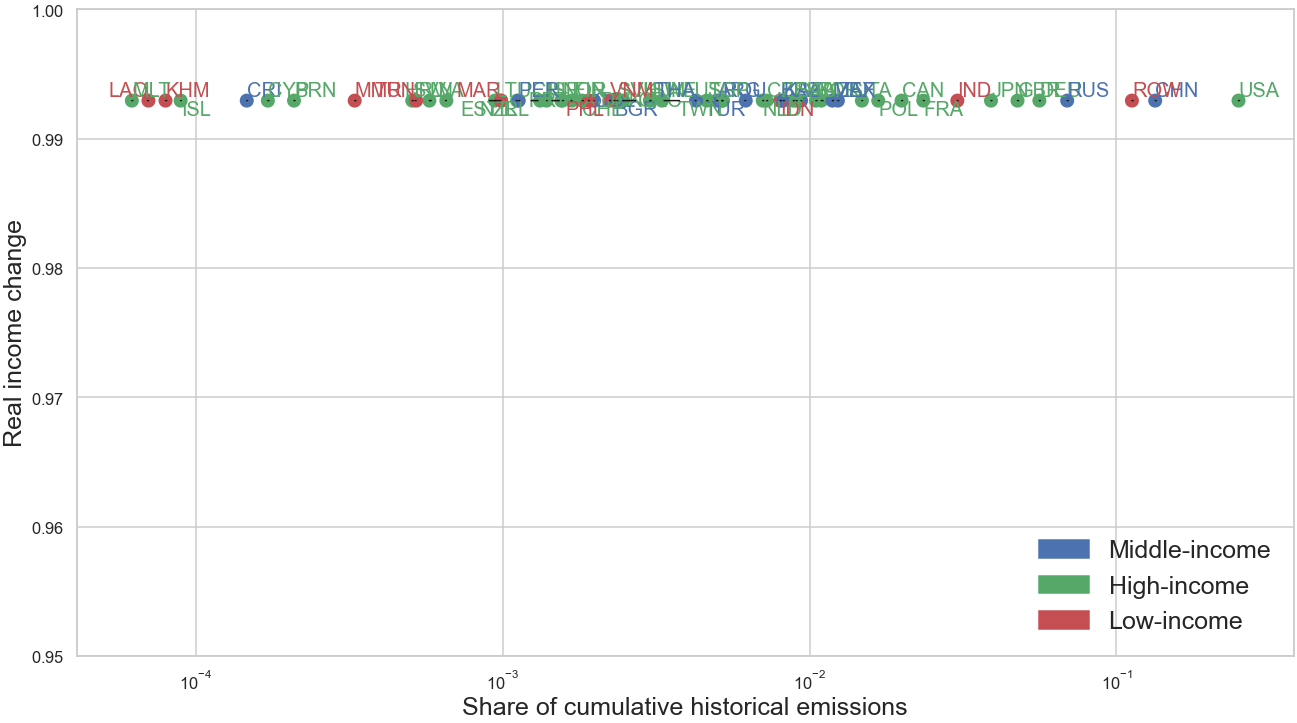

In [31]:
welfare_change = sol_fair.utility.copy()

welfare_change['share_cumul_emissions'] = pd.read_csv('data/share_of_cumulative_co2_treated.csv',index_col=[0,1]).loc[2018]
welfare_change = welfare_change.join(pd.read_csv('data/World bank/country_income_rank.csv',sep=';',index_col=0))

fig, ax = plt.subplots(figsize=(18,10),constrained_layout = True)

colors = [income_colors[welfare_change.loc[country,'income_label']] for country in welfare_change.index]

ax.scatter(welfare_change['share_cumul_emissions'],
            welfare_change['hat'],
            color = colors,
            lw=5
            )
ax.set_xscale('log')
texts = [plt.text(welfare_change['share_cumul_emissions'].loc[country], 
                  welfare_change['hat'].loc[country], 
                  country,
                  size=20, 
                  c = colors[i]) for i,country in enumerate(country_list)]

adjust_text(texts, precision=0.001,
        expand_text=(1.01, 1.05), expand_points=(1.01, 1.05),
        force_text=(0.01, 0.25), force_points=(0.01, 0.25),
        arrowprops=dict(arrowstyle='-', color='k'#, alpha=.5
                        )
            )
handles = [mpatches.Patch(color=income_colors[ind], label=ind) for ind in welfare_change['income_label'].drop_duplicates()]
ax.legend(handles=handles,
            fontsize=25,
            loc = 'lower right')
ax.set_xlabel('Share of cumulative historical emissions',fontsize = 25)
ax.set_ylabel('Real income change',fontsize = 25)
ax.set_ylim([0.95,1])

if save or save_all:
    plt.savefig(save_path+'fair_tax_welfare_change_by_share_cumul_emissions_by_country_by_income_group.'+save_format,format=save_format)
    
plt.show()


/var/folders/9z/_4pclxyj4ps7nxcwmqxlhkx17x8ksk/T/ipykernel_11335/3120345478.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''])


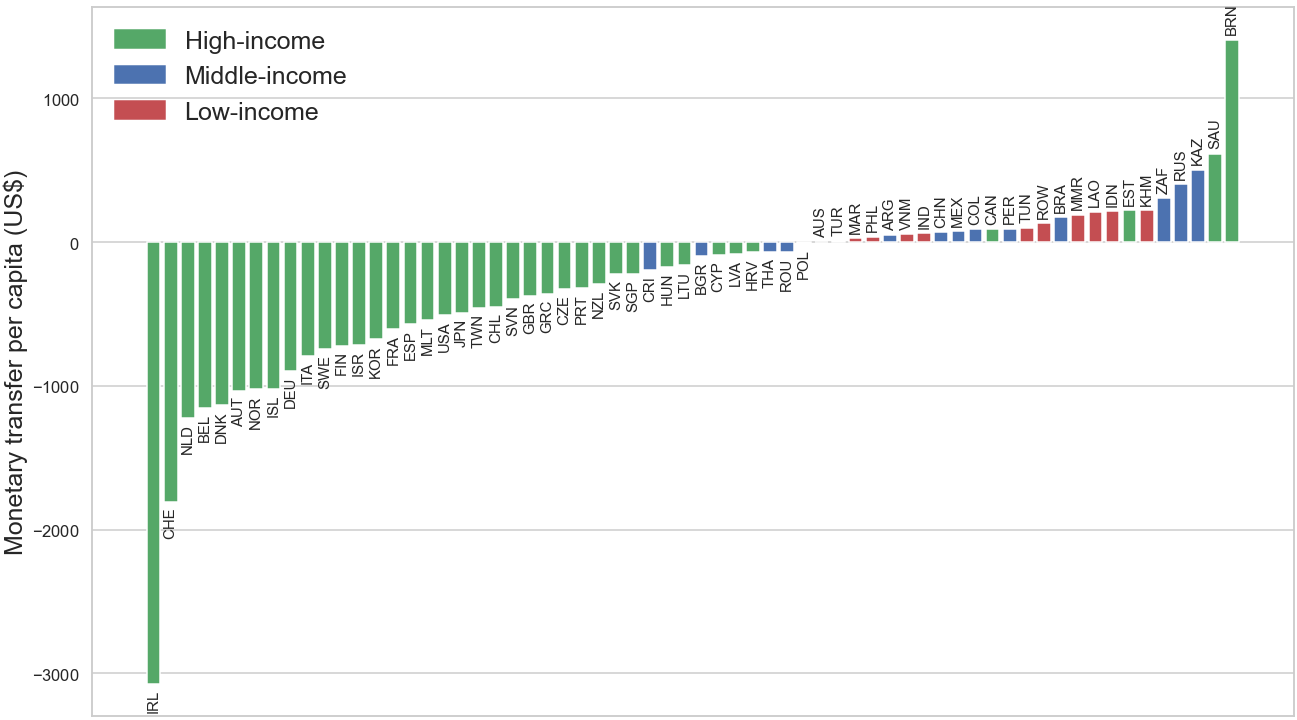

In [32]:
contrib = sol_fair.contrib.copy()
contrib['per_capita'] = contrib['value']*1e6/labor['value']
contrib = contrib.join(
    pd.read_csv('data/World bank/country_income_rank.csv',sep=';',index_col=0)
    ).sort_values('per_capita')

fig, ax = plt.subplots(figsize=(18,10),constrained_layout = True)

colors = [income_colors[contrib.loc[country,'income_label']] for country in contrib.index]

ax.bar(contrib.index,
       contrib['per_capita'],
       color=colors
       )
ax.set_xticklabels([''])
ax.bar_label(ax.containers[0],
             labels=contrib.index.get_level_values(0), 
             rotation=90,
              label_type = 'edge',
              padding=5,zorder=10,fontsize=15)
handles = [mpatches.Patch(color=income_colors[ind], label=ind) for ind in contrib['income_label'].drop_duplicates()]
ax.legend(handles=handles,fontsize=25)
ax.grid(axis='x')
ax.set_ylabel('Monetary transfer per capita (US$)',fontsize=25)

if save or save_all:
    plt.savefig(save_path+'fair_tax_transfers_by_country_by_income_group.'+save_format,format=save_format)
    
plt.show()

## Polluter pay tax

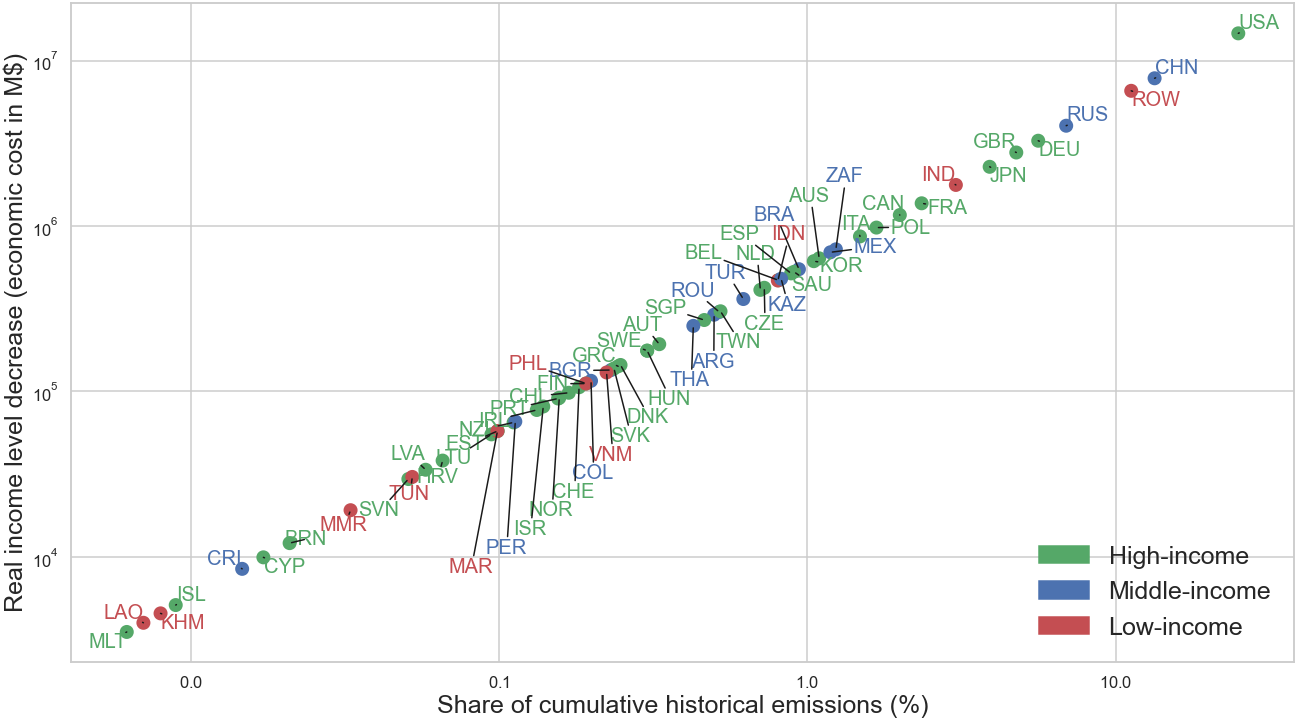

In [33]:
welfare_change = -(sol_pol_pay.utility.copy()-1)*b.cons.groupby('col_country').sum(
    ).rename_axis(['country']).rename(columns={'value':'hat'})

welfare_change['share_cumul_emissions'] = pd.read_csv('data/share_of_cumulative_co2_treated.csv',index_col=[0,1]).loc[2018]*100
welfare_change = welfare_change.join(pd.read_csv('data/World bank/country_income_rank.csv',sep=';',index_col=0))

welfare_change['hat'] = (welfare_change['hat']-1)*100

fig, ax = plt.subplots(figsize=(18,10),constrained_layout = True)

colors = [income_colors[welfare_change.loc[country,'income_label']] for country in welfare_change.index]

ax.scatter(welfare_change['share_cumul_emissions'],
           welfare_change['hat'],
           color = colors,
           lw=5
           )
ax.set_xscale('log')
ax.set_yscale('log')
texts = [plt.text(welfare_change['share_cumul_emissions'].loc[country], 
                  welfare_change['hat'].loc[country], 
                  country,
                  size=20, 
                  c = colors[i]) for i,country in enumerate(country_list)]

adjust_text(texts, precision=0.001,
        expand_text=(1.01, 1.05), expand_points=(1.01, 1.05),
        force_text=(0.01, 0.25), force_points=(0.01, 0.25),
        arrowprops=dict(arrowstyle='-', color='k'#, alpha=.5
                        )
            )
handles = [mpatches.Patch(color=income_colors[ind], label=ind) for ind in eff_tax_rate['income_label'].drop_duplicates()]
ax.legend(handles=handles,
           fontsize=25,
           loc = 'lower right')
ax.set_xlabel('Share of cumulative historical emissions (%)',fontsize = 25)
ax.set_ylabel('Real income level decrease (economic cost in M$)',fontsize = 25)
ax.xaxis.set_major_formatter(mticker.ScalarFormatter())
# ax.set_ylim([0.95,1])

if save or save_all:
    plt.savefig(save_path+'pol_pay_tax_welfare_change_by_share_cumul_emissions_by_country_by_income_group.'+save_format,format=save_format)
    
plt.show()

/var/folders/9z/_4pclxyj4ps7nxcwmqxlhkx17x8ksk/T/ipykernel_11335/1567188141.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''])


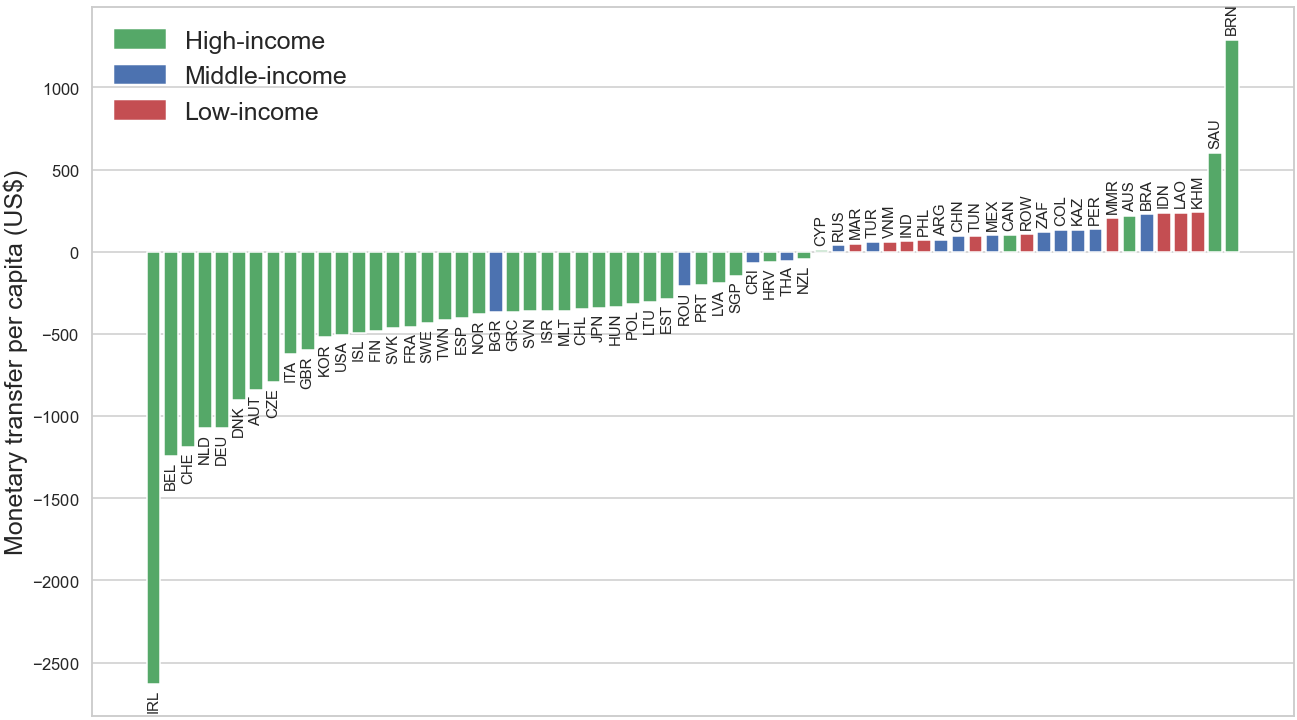

In [34]:
contrib = sol_pol_pay.contrib.copy()
contrib['per_capita'] = contrib['value']*1e6/labor['value']
contrib = contrib.join(
    pd.read_csv('data/World bank/country_income_rank.csv',sep=';',index_col=0)
    ).sort_values('per_capita')

fig, ax = plt.subplots(figsize=(18,10),constrained_layout = True)

colors = [income_colors[contrib.loc[country,'income_label']] for country in contrib.index]

ax.bar(contrib.index,
       contrib['per_capita'],
       color=colors
       )
ax.set_xticklabels([''])
ax.bar_label(ax.containers[0],
             labels=contrib.index.get_level_values(0), 
             rotation=90,
              label_type = 'edge',
              padding=5,zorder=10,fontsize=15)
handles = [mpatches.Patch(color=income_colors[ind], label=ind) for ind in contrib['income_label'].drop_duplicates()]
ax.legend(handles=handles,fontsize=25)
ax.grid(axis='x')
ax.set_ylabel('Monetary transfer per capita (US$)',fontsize=25)

if save or save_all:
    plt.savefig(save_path+'pol_pay_tax_transfers_by_country_by_income_group.'+save_format,format=save_format)
    
plt.show()

# Heterogeneous carbon prices !ONLY CP ESTIMATE

## IMF

ICPF on all countries


/var/folders/9z/_4pclxyj4ps7nxcwmqxlhkx17x8ksk/T/ipykernel_64449/1587296953.py:79: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''])


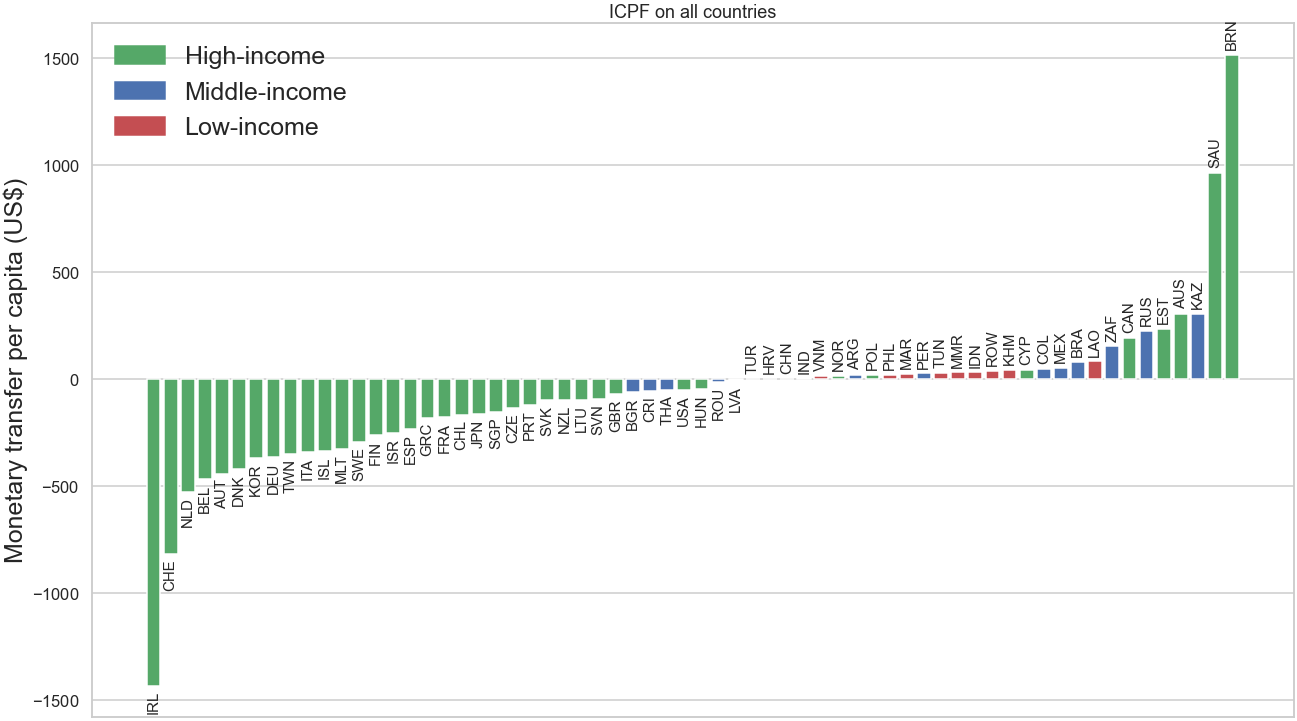

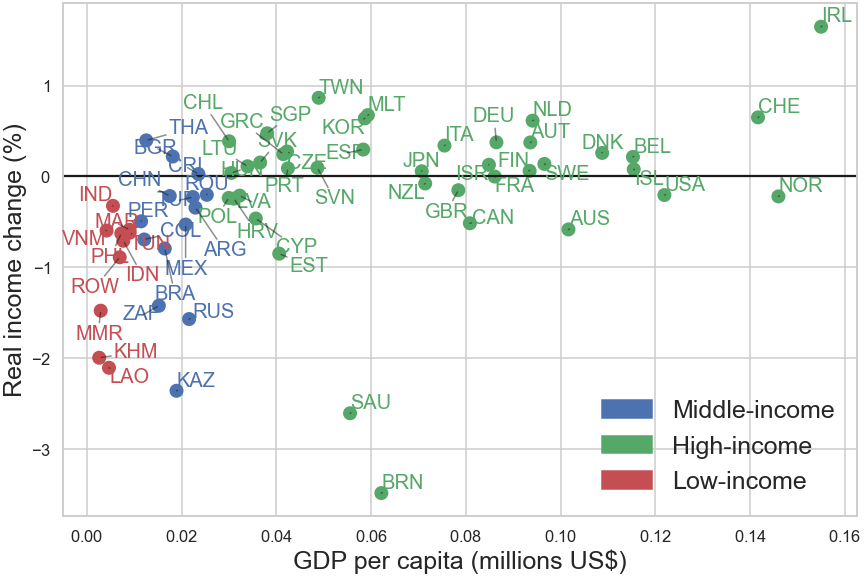

/var/folders/9z/_4pclxyj4ps7nxcwmqxlhkx17x8ksk/T/ipykernel_64449/1587296953.py:182: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''])


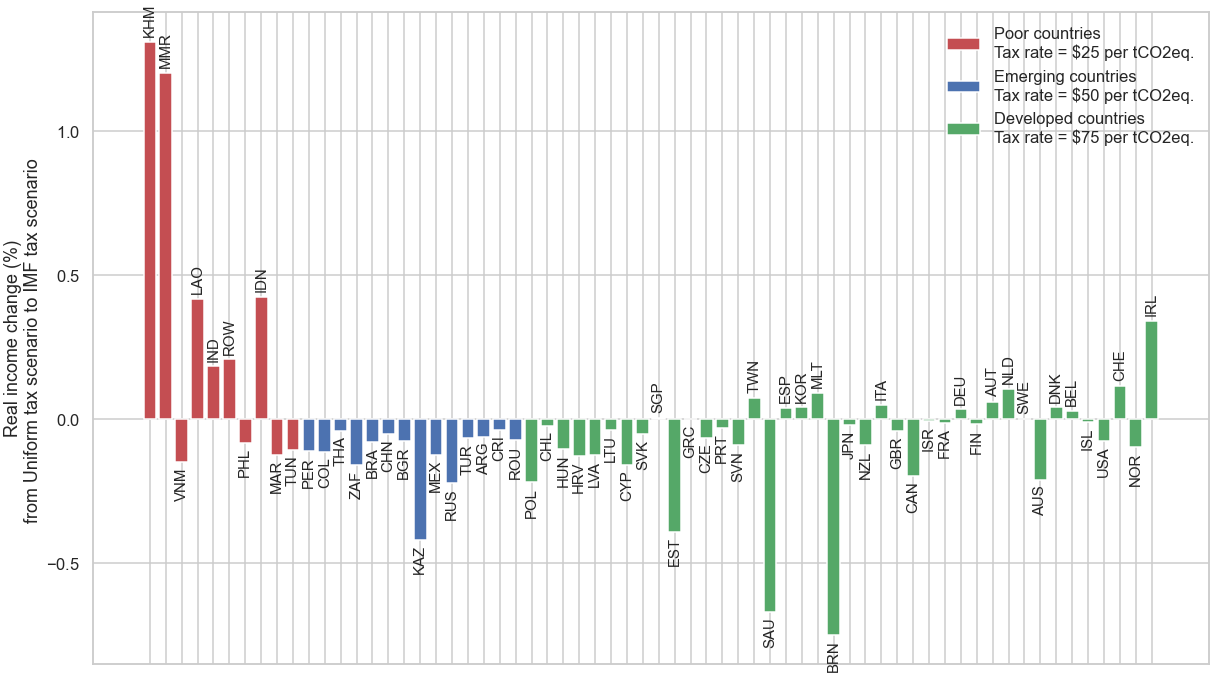

ICPF on G20 countries


/var/folders/9z/_4pclxyj4ps7nxcwmqxlhkx17x8ksk/T/ipykernel_64449/1587296953.py:79: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''])


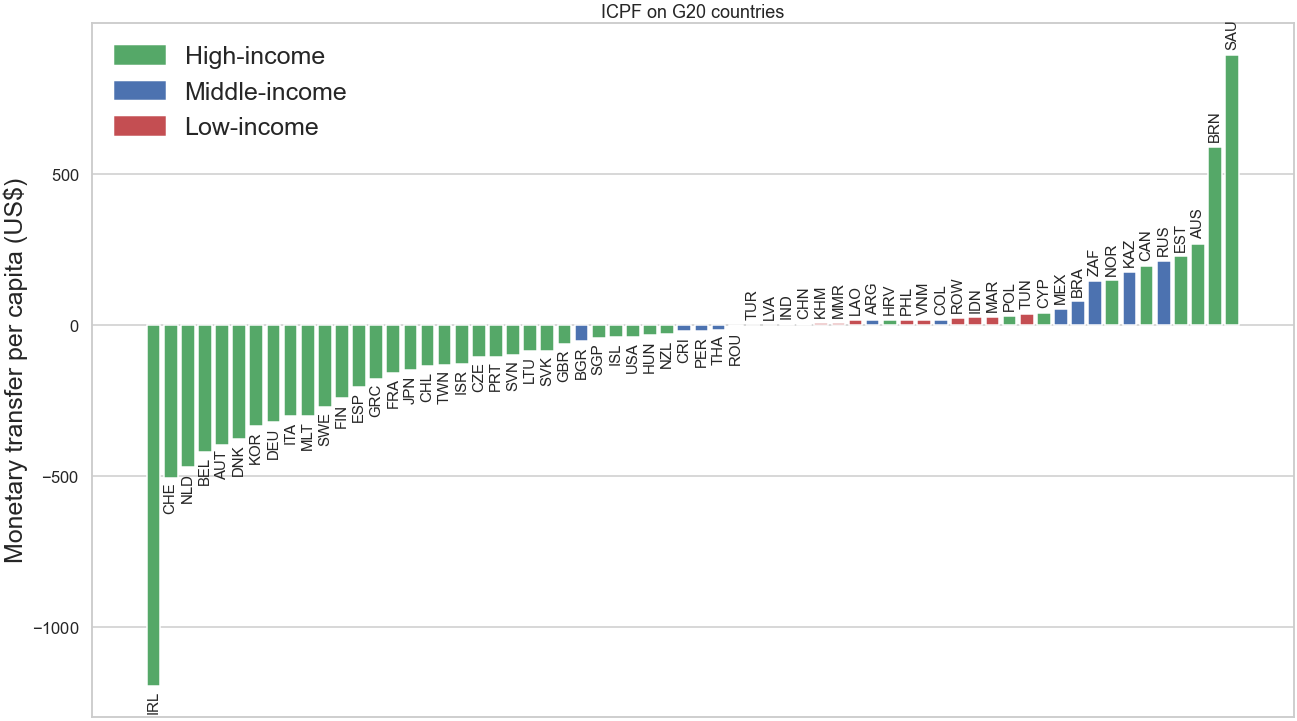

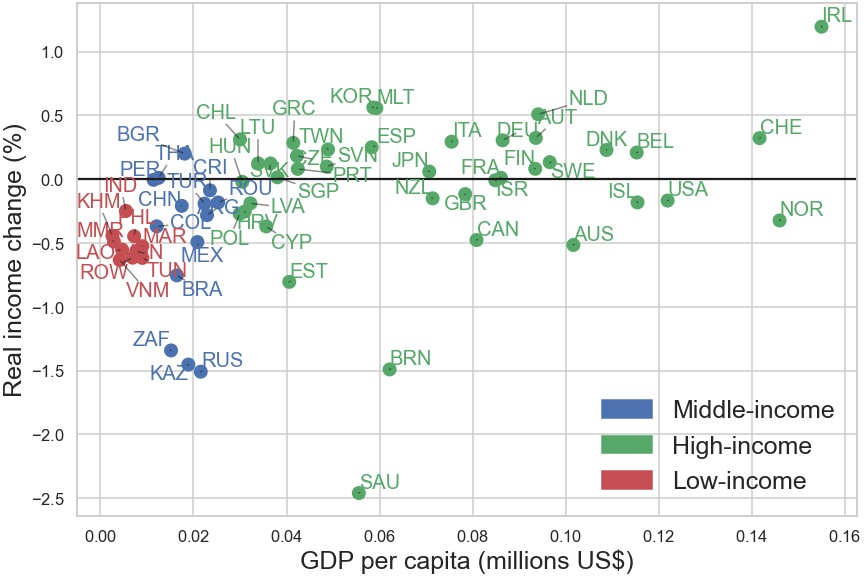

/var/folders/9z/_4pclxyj4ps7nxcwmqxlhkx17x8ksk/T/ipykernel_64449/1587296953.py:182: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''])


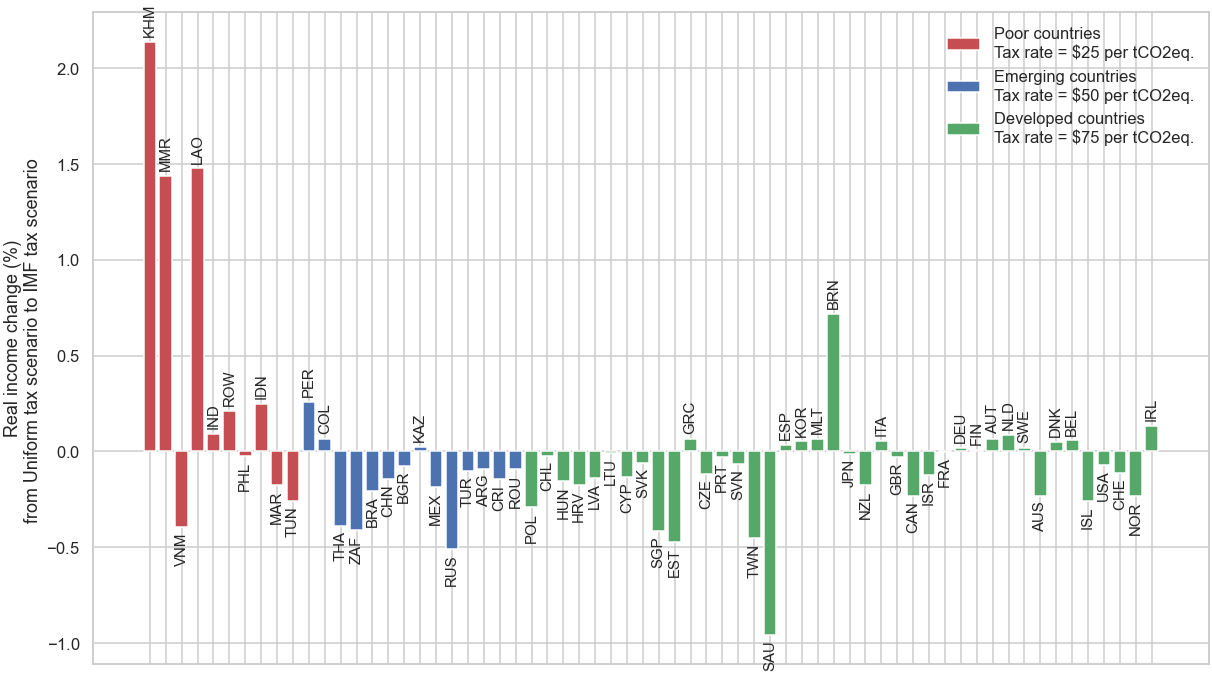

ICPF on IMF restricted club


/var/folders/9z/_4pclxyj4ps7nxcwmqxlhkx17x8ksk/T/ipykernel_64449/1587296953.py:79: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''])


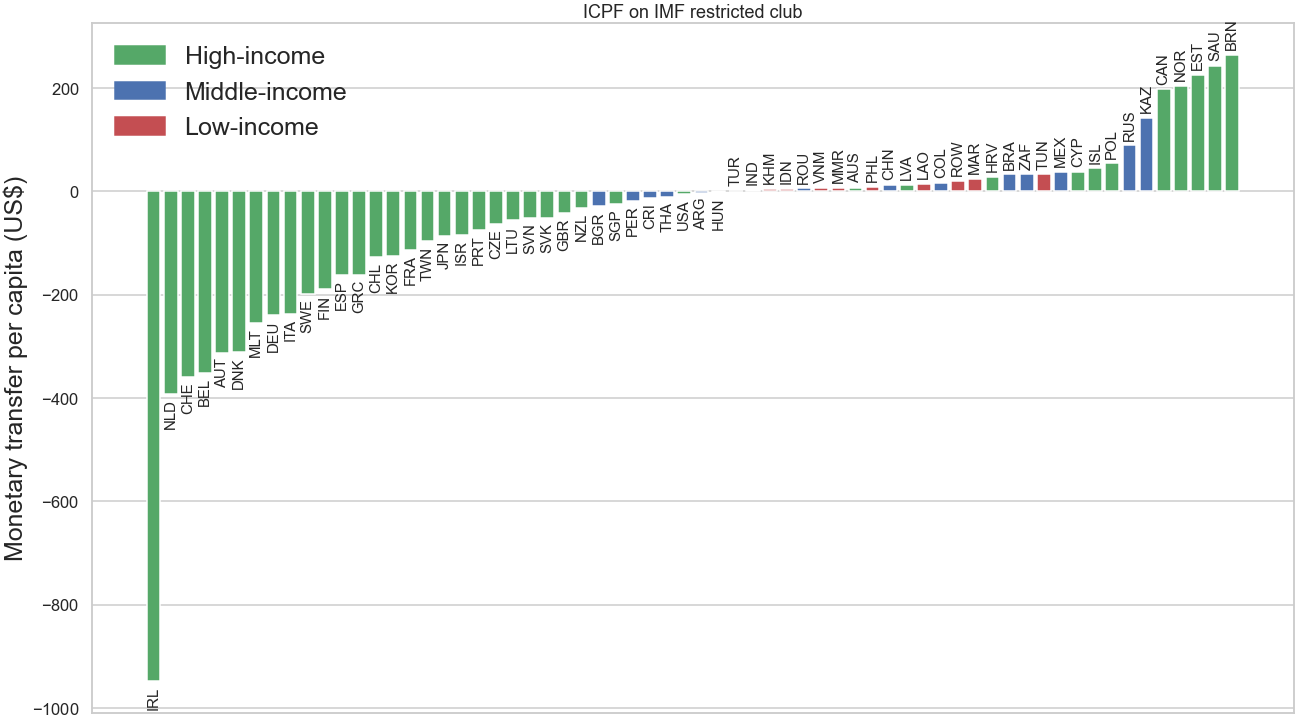

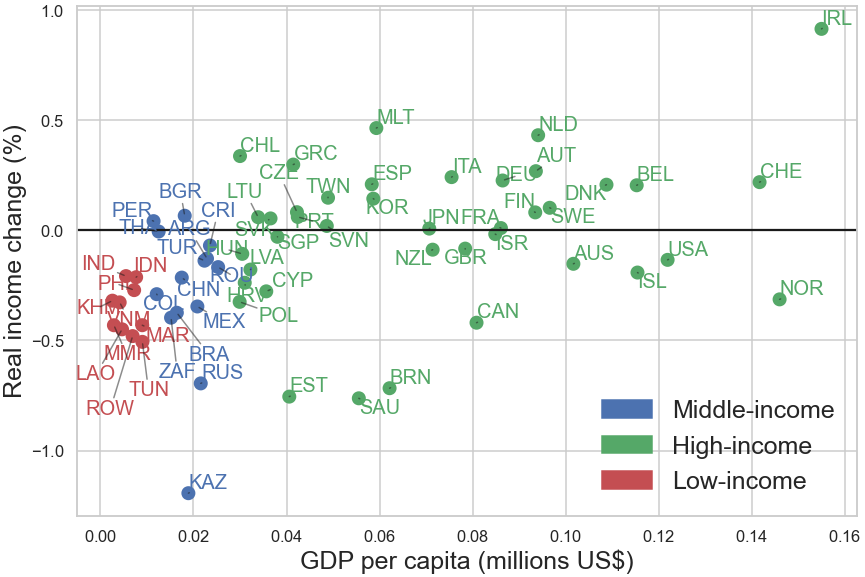

/var/folders/9z/_4pclxyj4ps7nxcwmqxlhkx17x8ksk/T/ipykernel_64449/1587296953.py:182: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''])


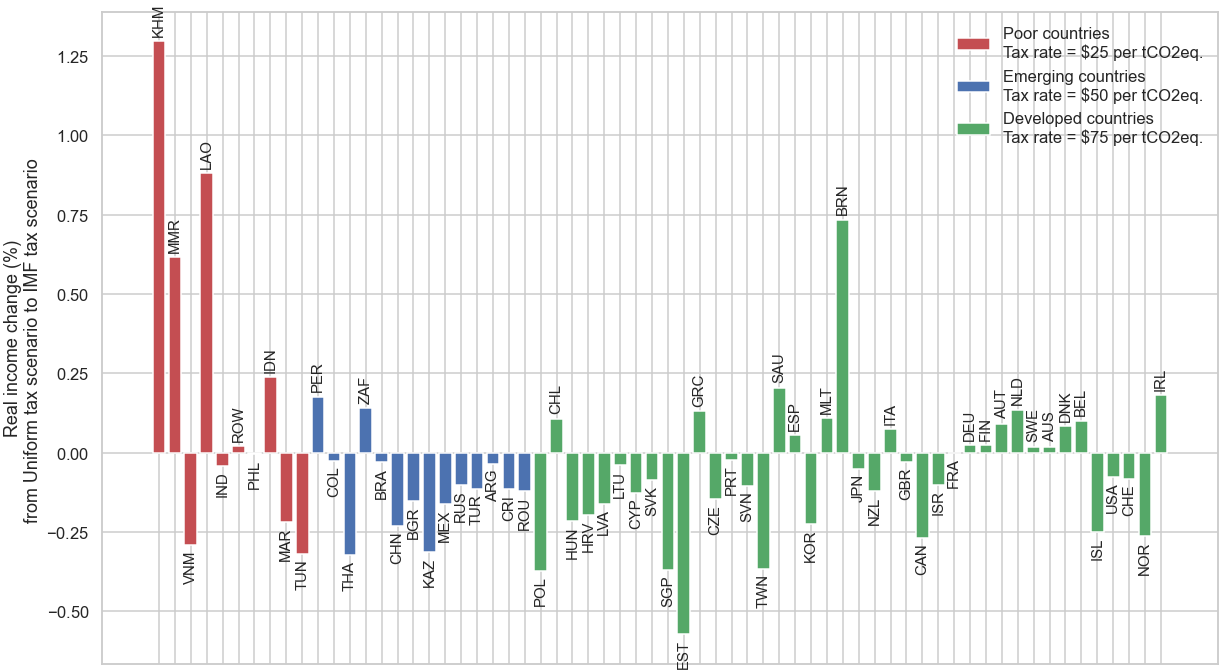

ICPF on key players club


/var/folders/9z/_4pclxyj4ps7nxcwmqxlhkx17x8ksk/T/ipykernel_64449/1587296953.py:79: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''])


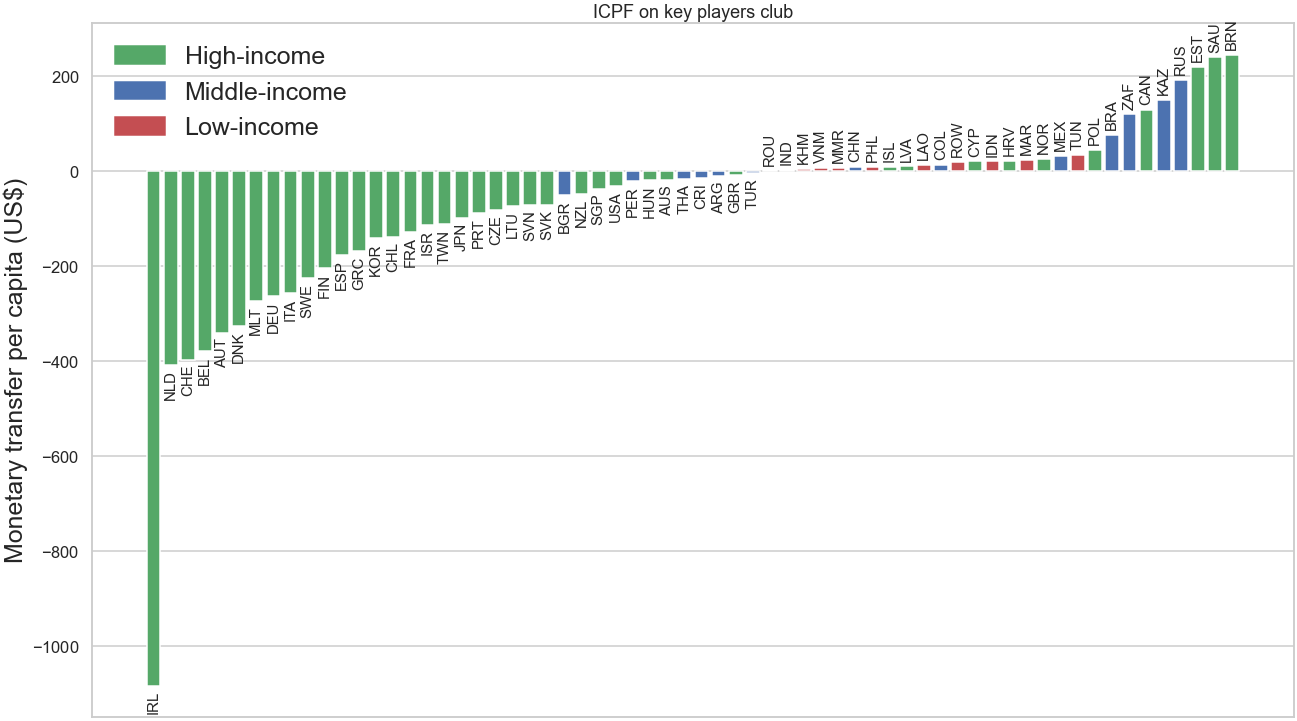

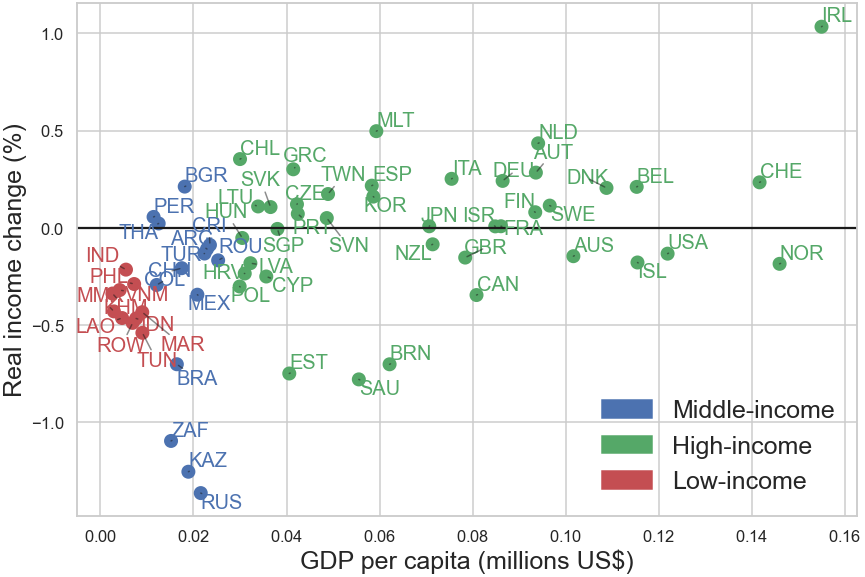

/var/folders/9z/_4pclxyj4ps7nxcwmqxlhkx17x8ksk/T/ipykernel_64449/1587296953.py:182: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''])


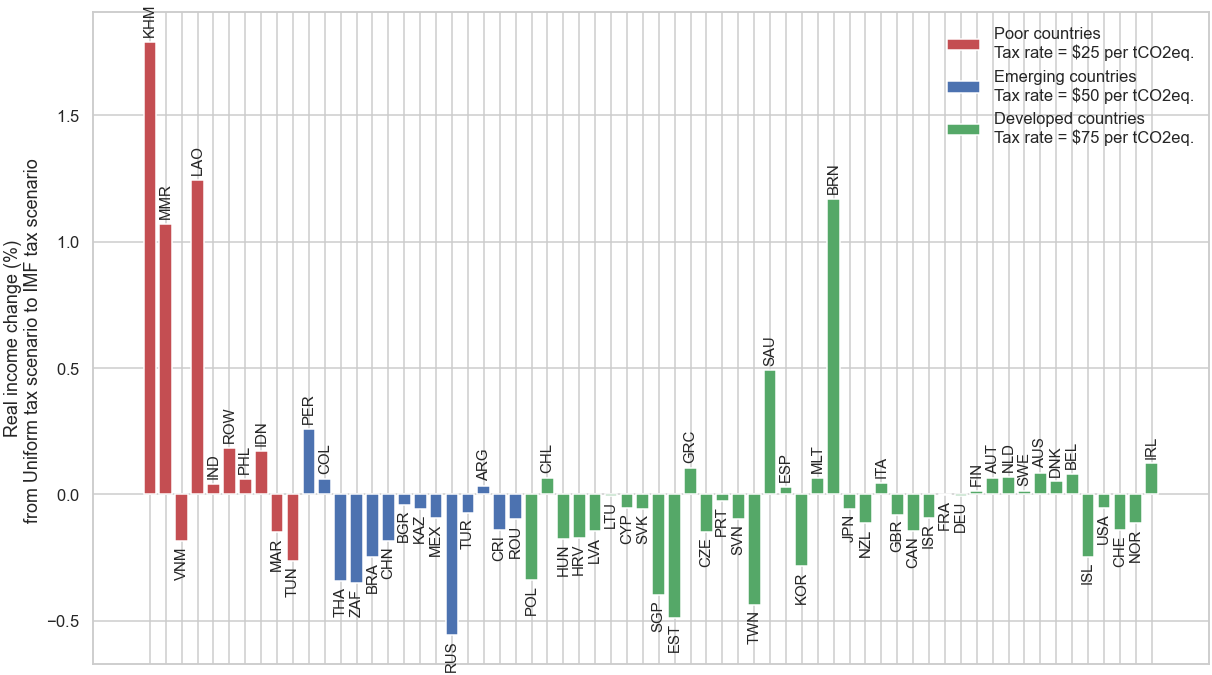

In [15]:
configs = [
    {'dir_num':115,
     'description':'ICPF on all countries',
     'fair_tax_run':215},
    {'dir_num':116,
     'description':'ICPF on G20 countries',
     'fair_tax_run':216},
    {'dir_num':117,
     'description':'ICPF on IMF restricted club',
     'fair_tax_run':217},
    {'dir_num':119,
     'description':'ICPF on key players club',
     'fair_tax_run':219},
    ]

save = False

year = str(2018)
df = pd.DataFrame()
# df = pd.read_csv(save_path+'summary_imf_configurations.csv',index_col = 0)
# df.index = [config['description'] for config in configs]
# baseline_em = b.co2_prod.value.sum()

for config in configs:
    dir_num = config['dir_num']
    print(config['description'])

    # dir_num = 115
    path = results_path+year+'_'+str(dir_num)
    runs_path = path+'/runs.csv'
        
    runs = pd.read_csv(runs_path,index_col=0)
    run = runs.iloc[-1]
    sol = t.sol(run,results_path,data_path)
    sol.compute_solution(b,inplace=True)
    
    dir_num_transfers = config['fair_tax_run']
    path_transfers = results_path+year+'_'+str(dir_num_transfers)
    runs_path_transfers = path_transfers+'/runs.csv'
    runs_transfers = pd.read_csv(runs_path_transfers,index_col=0)
    sol_transfers = t.sol(runs_transfers.loc[runs_transfers.fair_tax].iloc[0],results_path,data_path)
    transfers = sol_transfers.contrib[sol_transfers.contrib>0].sum().value
    df.loc[config['description'],'transfers'] = transfers
    
    uniform_tax_runs = pd.read_csv('results/2018_50/runs.csv')
    eq_uniform_tax_run = uniform_tax_runs.loc[np.argmin(np.abs(uniform_tax_runs.emissions-sol.run.emissions))]
    eq_uniform_tax_sol = t.sol(eq_uniform_tax_run,results_path,data_path)
    eq_uniform_tax_sol.compute_solution(b,inplace=True)
    
    uniform_tax_runs_fair = pd.read_csv('results/2018_150/runs.csv')
    eq_uniform_tax_run_fair = uniform_tax_runs_fair.loc[np.argmin(np.abs(uniform_tax_runs_fair.emissions-sol.run.emissions))]
    eq_uniform_tax_sol_fair = t.sol(eq_uniform_tax_run_fair,results_path,data_path)
    eq_uniform_tax_sol_fair.compute_solution(b,inplace=True)
    
    df.loc[config['description'],'additional real income cost'] = 100*(sol.run.utility-eq_uniform_tax_sol.run.utility)/(eq_uniform_tax_sol.run.utility-1)
    
    df.loc[config['description'],'tax equivalent'] = eq_uniform_tax_run.carb_cost*1e6
    df.loc[config['description'],'fair tax equivalent'] = eq_uniform_tax_run_fair.carb_cost*1e6
    
    df.loc[config['description'],'equivalent fair tax transfers'] = eq_uniform_tax_sol_fair.contrib[eq_uniform_tax_sol_fair.contrib>0].sum().value
    df.loc[config['description'],'additional transfers'] = 100*(df.loc[config['description'],'transfers']
                                                                -eq_uniform_tax_sol_fair.contrib[eq_uniform_tax_sol_fair.contrib>0].sum().value
                                                                )/(eq_uniform_tax_sol_fair.contrib[eq_uniform_tax_sol_fair.contrib>0].sum().value) 
    
    contrib = sol_transfers.contrib.copy()
    contrib['per_capita'] = contrib['value']*1e6/labor['value']
    contrib = contrib.join(
        pd.read_csv('data/World bank/country_income_rank.csv',sep=';',index_col=0)
        ).sort_values('per_capita')

    fig, ax = plt.subplots(figsize=(18,10),constrained_layout = True)

    colors = [income_colors[contrib.loc[country,'income_label']] for country in contrib.index]

    ax.bar(contrib.index,
           contrib['per_capita'],
           color=colors
           )
    ax.set_xticklabels([''])
    ax.bar_label(ax.containers[0],
                 labels=contrib.index.get_level_values(0), 
                 rotation=90,
                  label_type = 'edge',
                  padding=5,zorder=10,fontsize=15)
    handles = [mpatches.Patch(color=income_colors[ind], label=ind) for ind in contrib['income_label'].drop_duplicates()]
    ax.legend(handles=handles,fontsize=25)
    ax.grid(axis='x')
    ax.set_ylabel('Monetary transfer per capita (US$)',fontsize=25)
    ax.set_title(config['description'])

    if save or save_all:
        plt.savefig(save_path+f'fair_tax_transfers_by_country_by_income_group_{config["description"]}.'+save_format,format=save_format)

    plt.show()
    
    welfare_change = sol.utility.copy()

    welfare_change['gdp_p_c'] = (b.va.groupby('col_country').sum()/labor).rename_axis('country')
    welfare_change = welfare_change.join(
        pd.read_csv('data/World bank/country_income_rank.csv',sep=';',index_col=0)
        )
    welfare_change['hat'] = (welfare_change['hat']-1)*100

    fig, ax = plt.subplots(figsize=(12,8),constrained_layout=True)

    colors = [income_colors[welfare_change.loc[country,'income_label']] for country in welfare_change.index]

    ax.scatter(welfare_change['gdp_p_c'],
               welfare_change['hat'],
               color = colors,
               lw=5
               )

    texts = [plt.text(welfare_change['gdp_p_c'].loc[country], 
                      welfare_change['hat'].loc[country], 
                      country,
                      size=20, 
                      c = colors[i]) for i,country in enumerate(country_list)]

    adjust_text(texts, precision=0.001,
            expand_text=(1.01, 1.05), expand_points=(1.01, 1.05),
            force_text=(0.01, 0.25), force_points=(0.01, 0.25),
            arrowprops=dict(arrowstyle='-', color='k', alpha=.5)
                )
    handles = [mpatches.Patch(color=income_colors[ind], label=ind) for ind in welfare_change['income_label'].drop_duplicates()]
    ax.legend(handles=handles,
               fontsize=25,
               loc = 'lower right')
    ax.set_xlabel('GDP per capita (millions US$)',fontsize = 25)
    ax.set_ylabel('Real income change (%)',fontsize = 25)

    ax.axhline(0, color='k')

    if save or save_all:
        plt.savefig(save_path+f'welfare_change_by_gdp_by_country_by_income_group_{config["description"]}.'+save_format,format=save_format)

    plt.show()
    
    # Plotting the difference
    y = (sol.utility/eq_uniform_tax_sol.utility).hat*100-100

    fig,ax = plt.subplots(figsize=(20,12))

    bars1 = ax.bar(x=gdp_p_c.loc[poor_countries].sort_values('value').index,
           height=y.loc[gdp_p_c.loc[poor_countries].sort_values('value').index.to_list()],
           label='Poor countries\nTax rate = $25 per tCO2eq.',
           color='r')
    bars2 = ax.bar(x=gdp_p_c.loc[emerging_countries].sort_values('value').index,
           height=y.loc[gdp_p_c.loc[emerging_countries].sort_values('value').index.to_list()],
           label='Emerging countries\nTax rate = $50 per tCO2eq.',
           color='b')
    bars3 = ax.bar(x=gdp_p_c.loc[rich_countries].sort_values('value').index
           ,height=y.loc[gdp_p_c.loc[rich_countries].sort_values('value').index.to_list()],
           label='Developed countries\nTax rate = $75 per tCO2eq.',
           color='g')

    ax.bar_label(bars1,
                  labels=gdp_p_c.loc[poor_countries].sort_values('value').index,
                  rotation=90,
                  label_type = 'edge',
                  padding=5,
                  fontsize=15,
                  # color=colors[g],
                  zorder=99)
    ax.bar_label(bars2,
                  labels=gdp_p_c.loc[emerging_countries].sort_values('value').index,
                  rotation=90,
                  label_type = 'edge',
                  padding=5,
                  fontsize=15,
                  # color=colors[g],
                  zorder=99)
    ax.bar_label(bars3,
                  labels=gdp_p_c.loc[rich_countries].sort_values('value').index,
                  rotation=90,
                  label_type = 'edge',
                  padding=5,
                  fontsize=15,
                  # color=colors[g],
                  zorder=99)

    ax.set_xticklabels([''])

    ax.set_ylabel('Real income change (%)\nfrom Uniform tax scenario to IMF tax scenario ')

    plt.legend()
    
    if save or save_all:
        plt.savefig(save_path+f'diff_welfare_change_by_gdp_by_country_by_income_group_{config["description"]}.'+save_format,format=save_format)
    
    plt.show()
    
if save_all or save:
    df.to_csv(save_path+'summary_imf_configurations.csv')

## CBAM

EU tax with CBAM


/var/folders/9z/_4pclxyj4ps7nxcwmqxlhkx17x8ksk/T/ipykernel_2068/2843747809.py:69: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''])


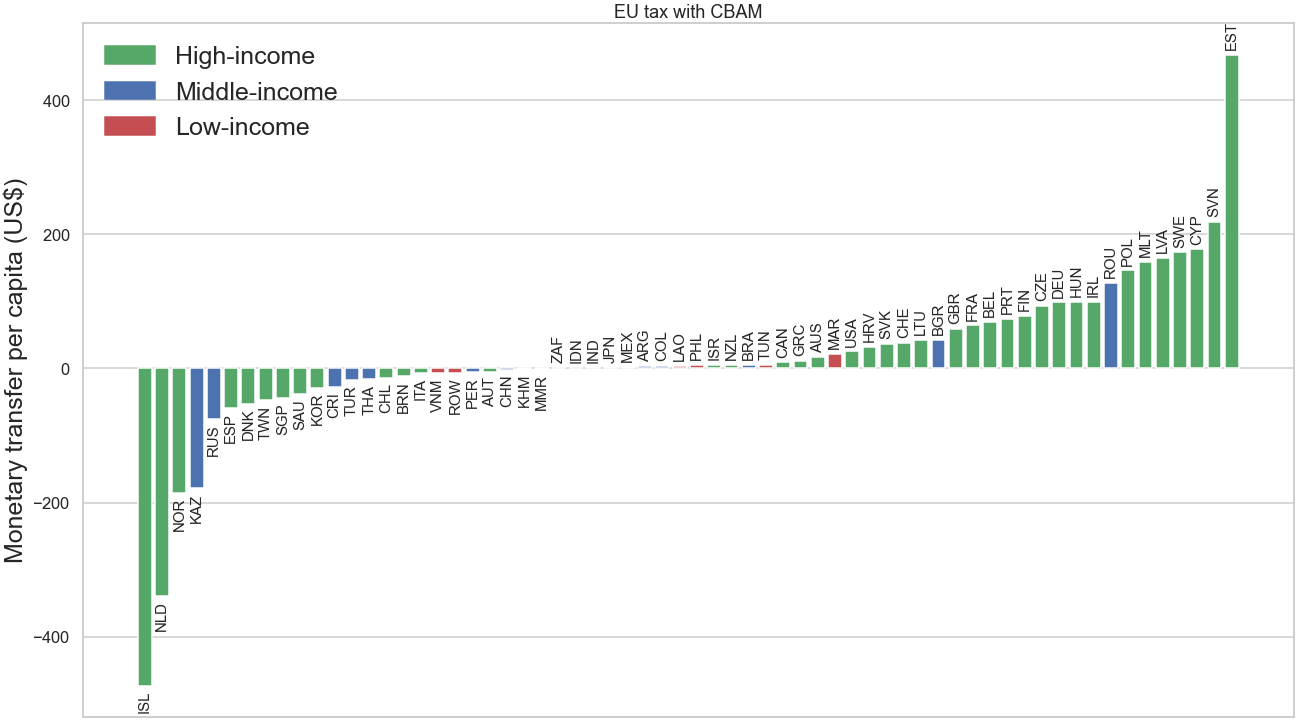

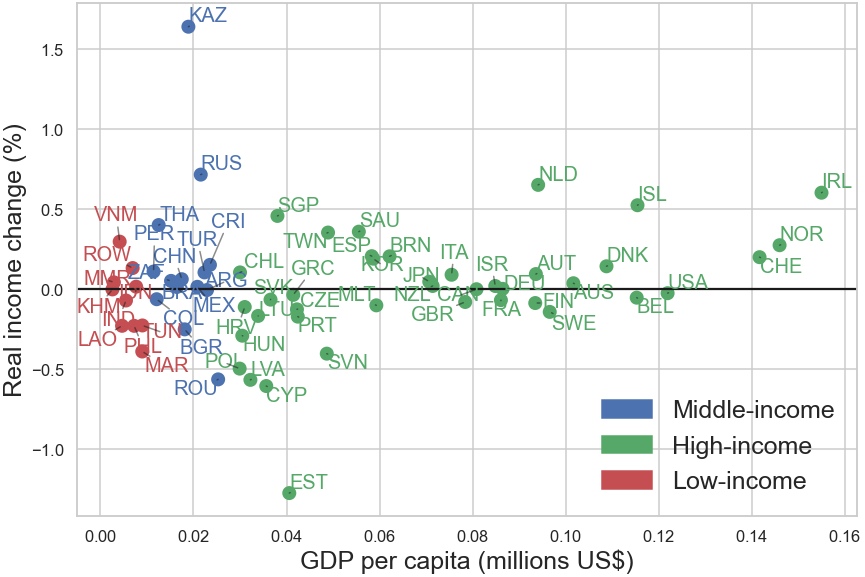

Key players club with CBAM


/var/folders/9z/_4pclxyj4ps7nxcwmqxlhkx17x8ksk/T/ipykernel_2068/2843747809.py:69: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''])


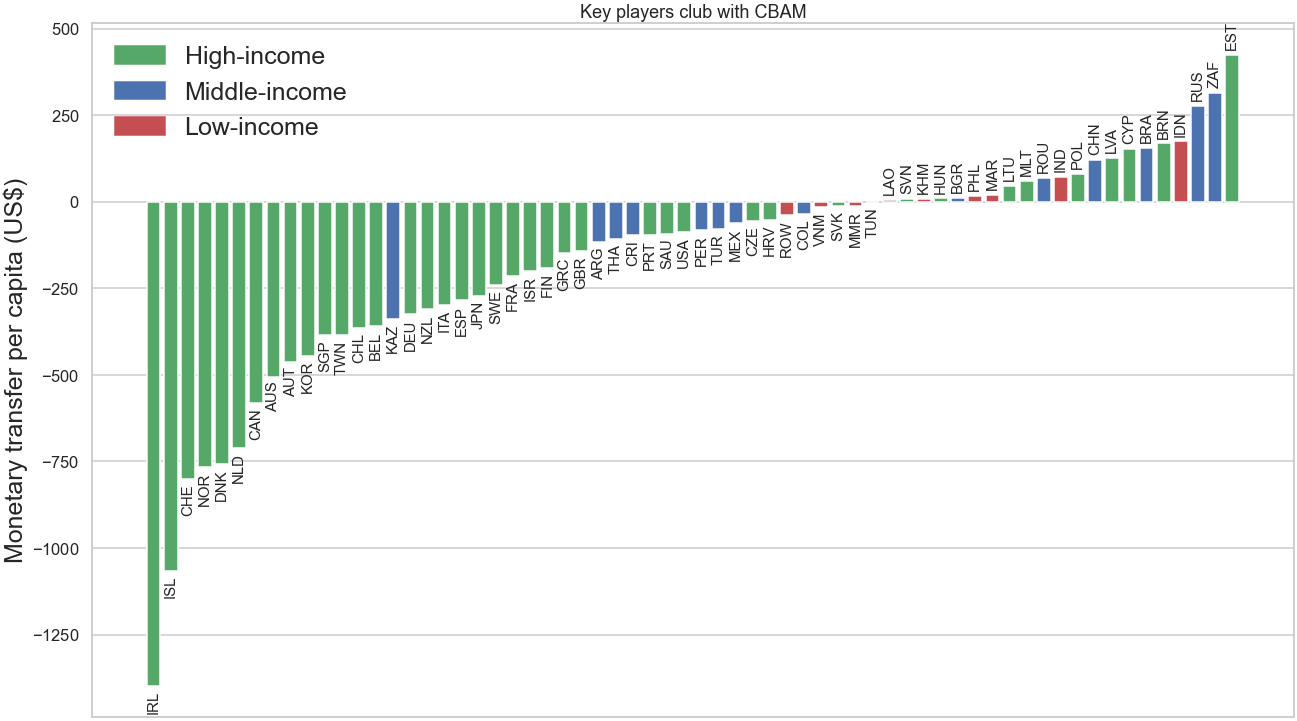

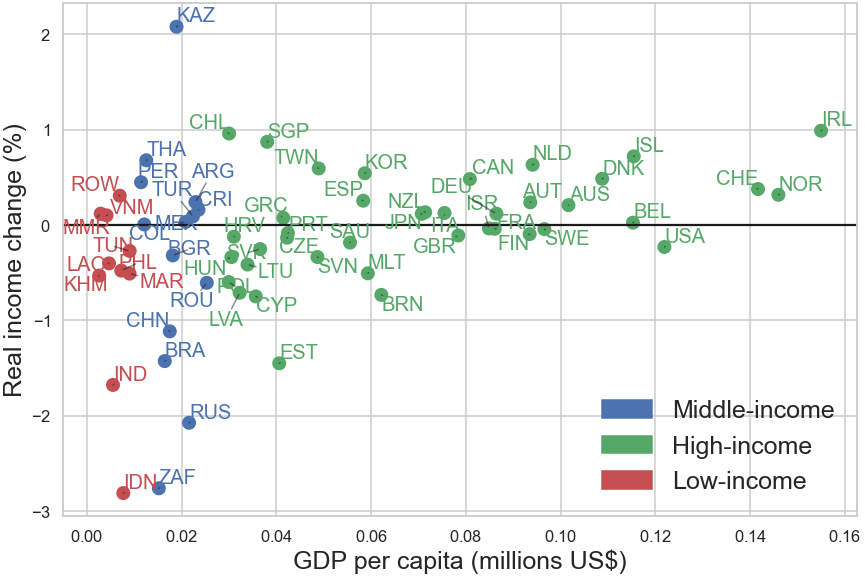

In [49]:
configs = [
    {'dir_num':125,
     'description':'EU tax with CBAM',
     'fair_tax_run':225},
    {'dir_num':127,
     'description':'Key players club with CBAM',
     'fair_tax_run':227},
    ]

save = False

df = pd.DataFrame()

for config in configs:
    dir_num = config['dir_num']
    print(config['description'])

    # dir_num = 115
    path = results_path+year+'_'+str(dir_num)
    runs_path = path+'/runs.csv'
        
    runs = pd.read_csv(runs_path,index_col=0)
    run = runs.iloc[-1]
    sol = t.sol(run,results_path,data_path)
    sol.compute_solution(b,inplace=True)
    
    dir_num_transfers = config['fair_tax_run']
    path_transfers = results_path+year+'_'+str(dir_num_transfers)
    runs_path_transfers = path_transfers+'/runs.csv'
    runs_transfers = pd.read_csv(runs_path_transfers,index_col=0)
    sol_transfers = t.sol(runs_transfers.loc[runs_transfers.fair_tax].iloc[0],results_path,data_path)
    transfers = sol_transfers.contrib[sol_transfers.contrib>0].sum().value
    df.loc[config['description'],'transfers'] = transfers
    
    uniform_tax_runs = pd.read_csv('results/2018_50/runs.csv')
    eq_uniform_tax_run = uniform_tax_runs.loc[np.argmin(np.abs(uniform_tax_runs.emissions-sol.run.emissions))]
    eq_uniform_tax_sol = t.sol(eq_uniform_tax_run,results_path,data_path)
    eq_uniform_tax_sol.compute_solution(b,inplace=True)
    
    uniform_tax_runs_fair = pd.read_csv('results/2018_150/runs.csv')
    eq_uniform_tax_run_fair = uniform_tax_runs_fair.loc[np.argmin(np.abs(uniform_tax_runs_fair.emissions-sol.run.emissions))]
    eq_uniform_tax_sol_fair = t.sol(eq_uniform_tax_run_fair,results_path,data_path)
    eq_uniform_tax_sol_fair.compute_solution(b,inplace=True)
    
    df.loc[config['description'],'additional real income cost'] = 100*(sol.run.utility-eq_uniform_tax_sol.run.utility)/(eq_uniform_tax_sol.run.utility-1)
    
    df.loc[config['description'],'tax equivalent'] = eq_uniform_tax_run.carb_cost*1e6
    df.loc[config['description'],'fair tax equivalent'] = eq_uniform_tax_run_fair.carb_cost*1e6
    
    df.loc[config['description'],'equivalent fair tax transfers'] = eq_uniform_tax_sol_fair.contrib[eq_uniform_tax_sol_fair.contrib>0].sum().value
    df.loc[config['description'],'additional transfers'] = 100*(df.loc[config['description'],'transfers']
                                                                -eq_uniform_tax_sol_fair.contrib[eq_uniform_tax_sol_fair.contrib>0].sum().value
                                                                )/(eq_uniform_tax_sol_fair.contrib[eq_uniform_tax_sol_fair.contrib>0].sum().value) 
    
    contrib = sol_transfers.contrib.copy()
    contrib['per_capita'] = contrib['value']*1e6/labor['value']
    contrib = contrib.join(
        pd.read_csv('data/World bank/country_income_rank.csv',sep=';',index_col=0)
        ).sort_values('per_capita')

    fig, ax = plt.subplots(figsize=(18,10),constrained_layout = True)

    colors = [income_colors[contrib.loc[country,'income_label']] for country in contrib.index]

    ax.bar(contrib.index,
           contrib['per_capita'],
           color=colors
           )
    ax.set_xticklabels([''])
    ax.bar_label(ax.containers[0],
                 labels=contrib.index.get_level_values(0), 
                 rotation=90,
                  label_type = 'edge',
                  padding=5,zorder=10,fontsize=15)
    handles = [mpatches.Patch(color=income_colors[ind], label=ind) for ind in contrib['income_label'].drop_duplicates()]
    ax.legend(handles=handles,fontsize=25)
    ax.grid(axis='x')
    ax.set_ylabel('Monetary transfer per capita (US$)',fontsize=25)
    ax.set_title(config['description'])

    if save or save_all:
        plt.savefig(save_path+f'fair_tax_transfers_by_country_by_income_group_{config["description"]}.'+save_format,format=save_format)

    plt.show()
    
    welfare_change = sol.utility.copy()

    welfare_change['gdp_p_c'] = (b.va.groupby('col_country').sum()/labor).rename_axis('country')
    welfare_change = welfare_change.join(
        pd.read_csv('data/World bank/country_income_rank.csv',sep=';',index_col=0)
        )
    welfare_change['hat'] = (welfare_change['hat']-1)*100

    fig, ax = plt.subplots(figsize=(12,8),constrained_layout=True)

    colors = [income_colors[welfare_change.loc[country,'income_label']] for country in welfare_change.index]

    ax.scatter(welfare_change['gdp_p_c'],
               welfare_change['hat'],
               color = colors,
               lw=5
               )

    texts = [plt.text(welfare_change['gdp_p_c'].loc[country], 
                      welfare_change['hat'].loc[country], 
                      country,
                      size=20, 
                      c = colors[i]) for i,country in enumerate(country_list)]

    adjust_text(texts, precision=0.001,
            expand_text=(1.01, 1.05), expand_points=(1.01, 1.05),
            force_text=(0.01, 0.25), force_points=(0.01, 0.25),
            arrowprops=dict(arrowstyle='-', color='k', alpha=.5)
                )
    handles = [mpatches.Patch(color=income_colors[ind], label=ind) for ind in welfare_change['income_label'].drop_duplicates()]
    ax.legend(handles=handles,
               fontsize=25,
               loc = 'lower right')
    ax.set_xlabel('GDP per capita (millions US$)',fontsize = 25)
    ax.set_ylabel('Real income change (%)',fontsize = 25)

    ax.axhline(0, color='k')

    if save or save_all:
        plt.savefig(save_path+f'welfare_change_by_gdp_by_country_by_income_group_{config["description"]}.'+save_format,format=save_format)

    plt.show()
    
if save_all or save:
    df.to_csv(save_path+'summary_cbam_configurations.csv')

## Incremental tax on countries with CBAM

In [ ]:
df = pd.read_csv(save_path+'cbam_incremental_tax_countries.csv',index_col=0)

countries = df.index.get_level_values(0)

t1 = df['term_1']*df['em_reduc']/(df['term_1']+df['term_2']+df['term_3'])
t2 = df['term_2']*df['em_reduc']/(df['term_1']+df['term_2']+df['term_3'])
t3 = df['term_3']*df['em_reduc']/(df['term_1']+df['term_2']+df['term_3'])
sum_t = t1+t2+t3

fig,ax = plt.subplots(figsize = (24,12),dpi = 288)

bars1 = ax.barh(countries,
                t1,
                label = 'Scale effect')
bars2 = ax.barh(countries,t2,left=t1, label = 'Composition effect')
bars3 = ax.barh(countries,t3,left=t1+t2, label = 'Sourcing effect')

ax.bar_label(bars3,
              labels=countries,
              label_type = 'edge',
              padding=5,
                fontsize=12,
              zorder=99)

ax.bar_label(bars1,
              labels = [round(t*100/sum_t[i],1) for i,t in enumerate(t1)],
              label_type = 'center',
              padding = 5,
              color = 'k',
              fontsize = 12,
              zorder = 99)
ax.bar_label(bars2,
              labels = [round(t*100/sum_t[i],1) for i,t in enumerate(t2)],
              label_type = 'center',
              padding = 5,
              color = 'k',
              fontsize = 12,
              zorder = 99)
ax.bar_label(bars3,
              labels = [round(t*100/sum_t[i],1) for i,t in enumerate(t3)],
              label_type = 'center',
              padding = 5,
              color = 'k',
              fontsize = 12,
              zorder = 99)

ax.axvline(x=df['em_reduc'].iloc[-1],
            color='red')
ax.set_xlabel('Emissions reduction (%)')

ax.legend(loc=(0,-0.2),title='Decomposition')

plt.tight_layout()

for save_format in ['eps','png','pdf']:
    plt.savefig(save_path+'cbam_incremental_tax_countries.'+save_format,
                format=save_format)

plt.show()

In [ ]:
countries = ['EU']

countries = []

for i,count_list in enumerate(pd.Series(decompositions_by_taxing_countries.keys()).apply(literal_eval)):
    if i == 0:
        countries.append('EU')
    else:
        for c in count_list:
            if c not in countries and c not in EU:
                countries.append(c)